In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons
import pandas as pd
import seaborn as sns
import re

In [ ]:
data_dir = "../data/aruba/data.csv"
df_aruba = pd.read_csv(
    data_dir,
    delim_whitespace=True,
    names=[
        "date",
        "time",
        "sensor_type",
        "sensor_status",
        "meta",
        "meta_begin_end",
    ],
)

pattern_motion_sensor = r"[M]{1}[0-9]{3,}"
pattern_temperature_sensor = r"[T]{1}[0-9]{3,}"
pattern_door_closure_sensor = r"[D]{1}[0-9]{3,}"

# Create subsets for each sensor type
df_motion_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_motion_sensor)
]
df_temperature_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_temperature_sensor)
]
df_door_closure_sensor = df_aruba[
    df_aruba["sensor_type"].str.match(pattern_door_closure_sensor)
]

display(df_temperature_sensor)
display(df_temperature_sensor["date"])

/tmp/ipykernel_797/3643230736.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_aruba = pd.read_csv(


,date,time,sensor_type,sensor_status,meta,meta_begin_end
2,2010-11-04,00:15:08.984841,T002,21.5,NaN,NaN
3,2010-11-04,00:30:19.185547,T003,21,NaN,NaN
4,2010-11-04,00:30:19.385336,T004,21,NaN,NaN
5,2010-11-04,00:35:22.24587,T005,20.5,NaN,NaN
6,2010-11-04,00:40:25.428962,T005,21,NaN,NaN
...,...,...,...,...,...,...
1719553,2011-06-11,23:42:59.28507,T002,25.5,NaN,NaN
1719554,2011-06-11,23:48:02.888409,T001,23.5,NaN,NaN
1719555,2011-06-11,23:48:02.988798,T002,25,NaN,NaN
1719556,2011-06-11,23:53:06.4292,T002,25.5,NaN,NaN


2          2010-11-04
3          2010-11-04
4          2010-11-04
5          2010-11-04
6          2010-11-04
              ...    
1719553    2011-06-11
1719554    2011-06-11
1719555    2011-06-11
1719556    2011-06-11
1719557    2011-06-11
Name: date, Length: 116572, dtype: object

/tmp/ipykernel_797/1153686278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperature_sensor['datetime'] = pd.to_datetime(df_temperature_sensor['date'] + ' ' + df_temperature_sensor['time'])


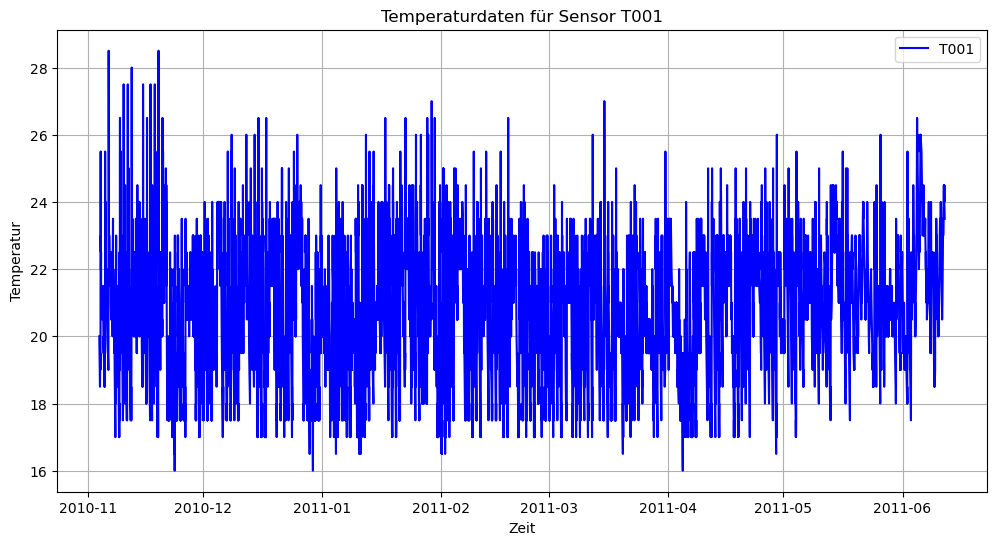

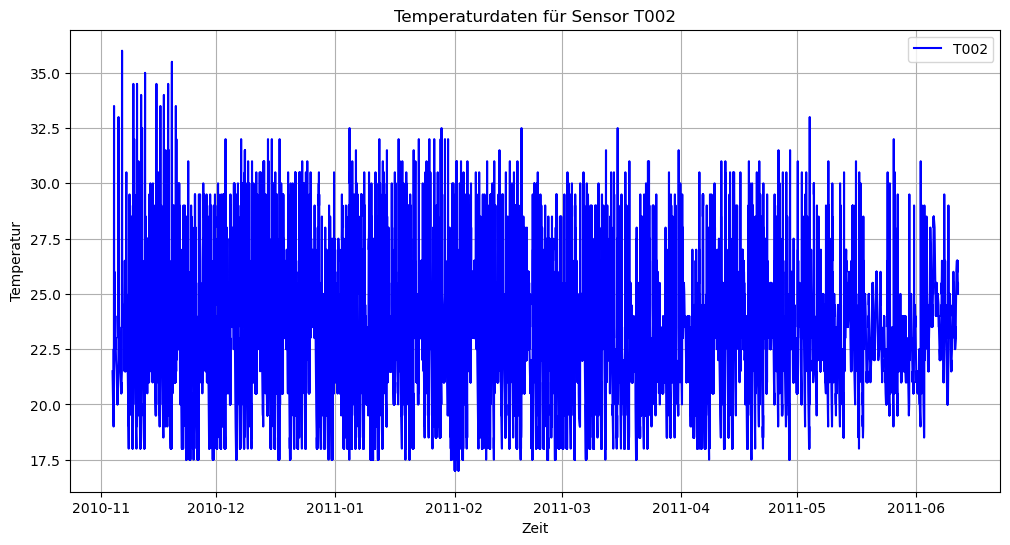

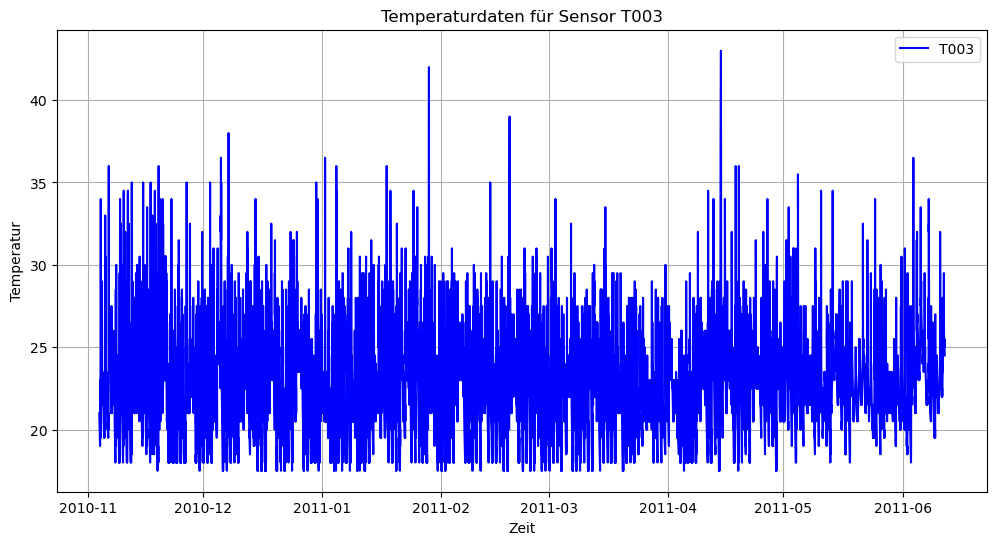

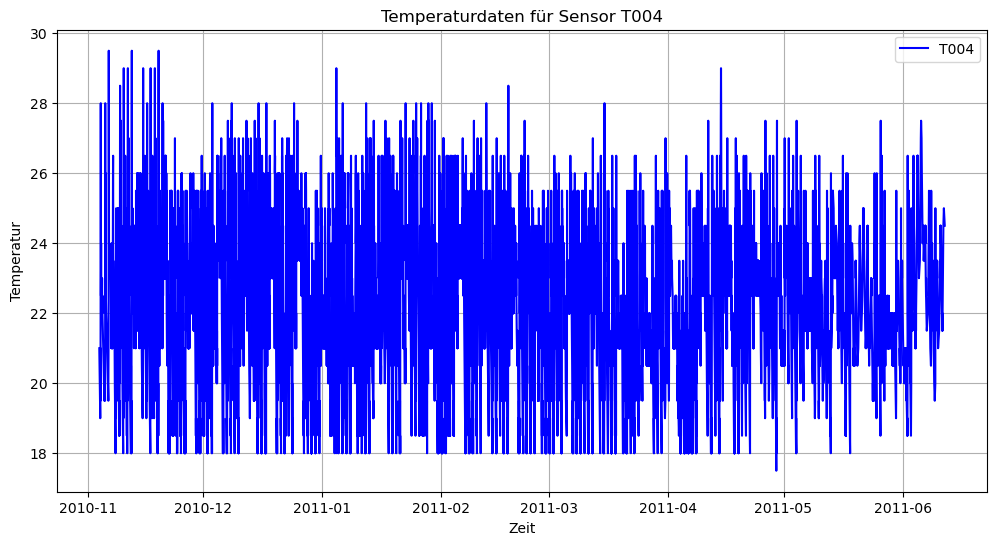

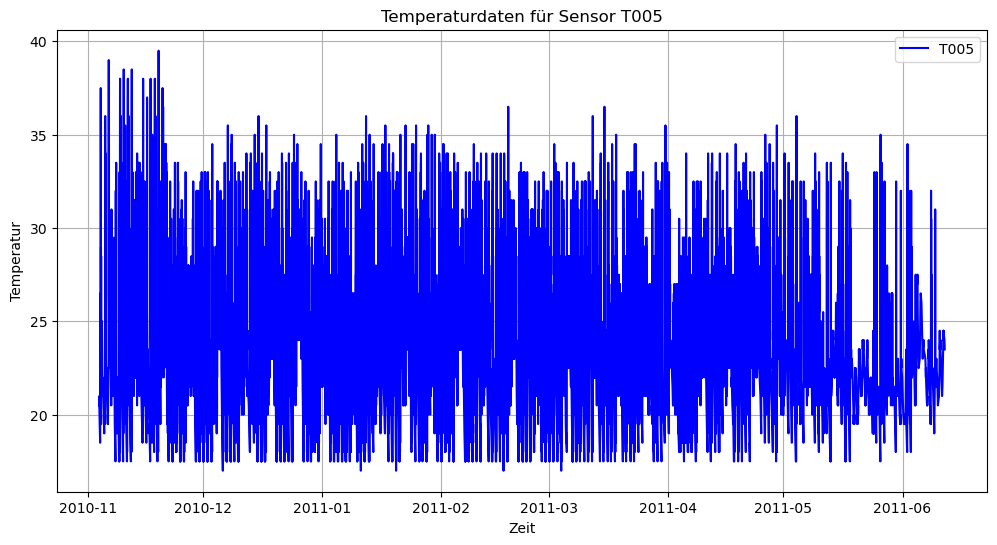

In [101]:
# Schwellenwert für Ausreißer
outlier_threshold = 100

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_temperature_sensor['datetime'] = pd.to_datetime(df_temperature_sensor['date'] + ' ' + df_temperature_sensor['time'])


# Sortiere die Daten nach Datum und Uhrzeit
df_temperature_sensor = df_temperature_sensor.sort_values(by='datetime')

# Konvertiere die sensor_status-Spalte in numerische Werte
df_temperature_sensor['sensor_status'] = pd.to_numeric(df_temperature_sensor['sensor_status'], errors='coerce')

# Filtere Ausreißer
df_temperature_sensor = df_temperature_sensor.loc[df_temperature_sensor['sensor_status'] <= outlier_threshold]


# Erstelle eine Liste der einzigartigen Sensoren, sortiert nach der Nummer im Namen (z. B. T001 zuerst)
unique_sensors = df_temperature_sensor['sensor_type'].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))


# Erstelle ein Diagramm für jeden Temperatursensor
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = df_temperature_sensor[df_temperature_sensor['sensor_type'] == sensor_id]
    
    #Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.plot(sensor_data['datetime'], sensor_data['sensor_status'], label=sensor_id, color='blue')
    plt.title(f'Temperaturdaten für Sensor {sensor_id}')
    plt.xlabel('Zeit')
    plt.ylabel('Temperatur')
    plt.legend()
    plt.grid(True)
    plt.show()


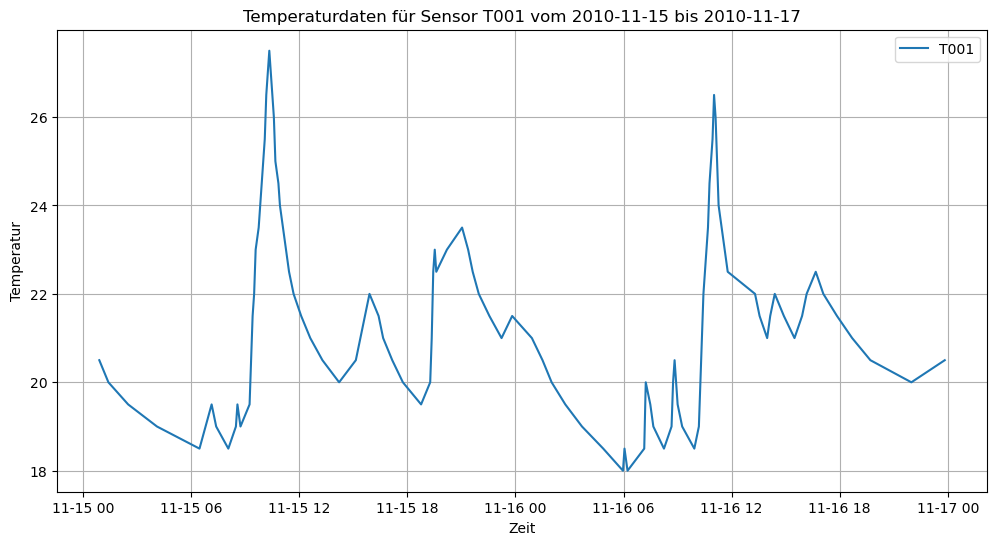

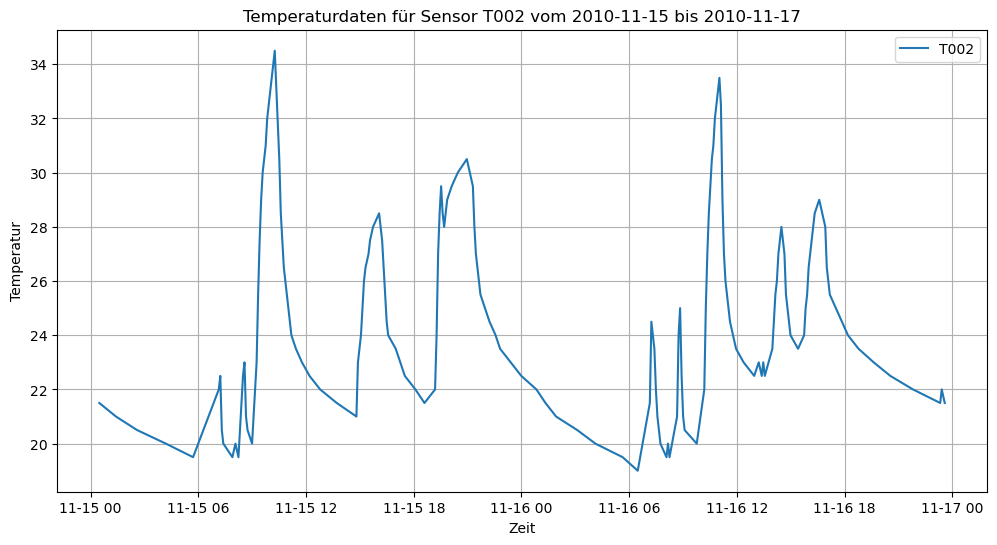

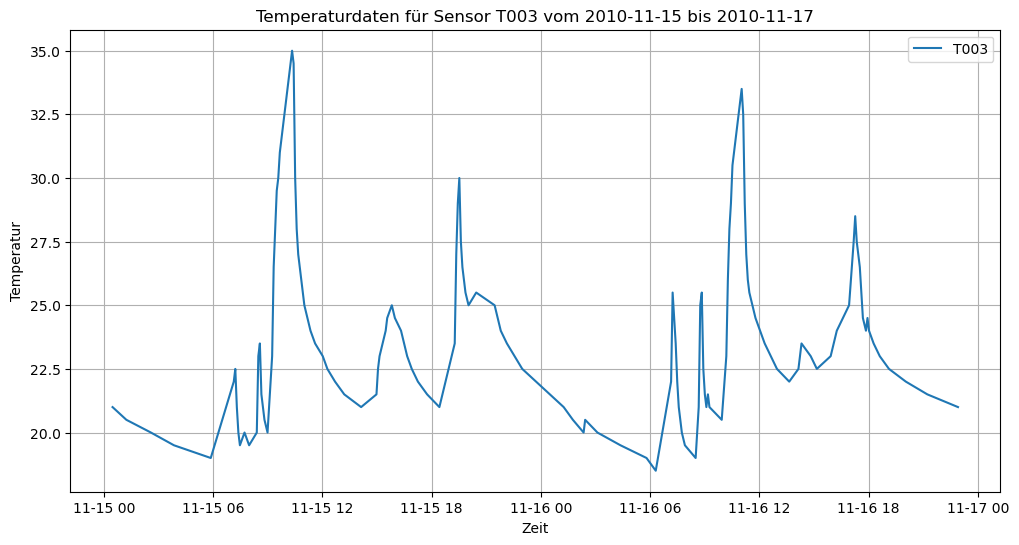

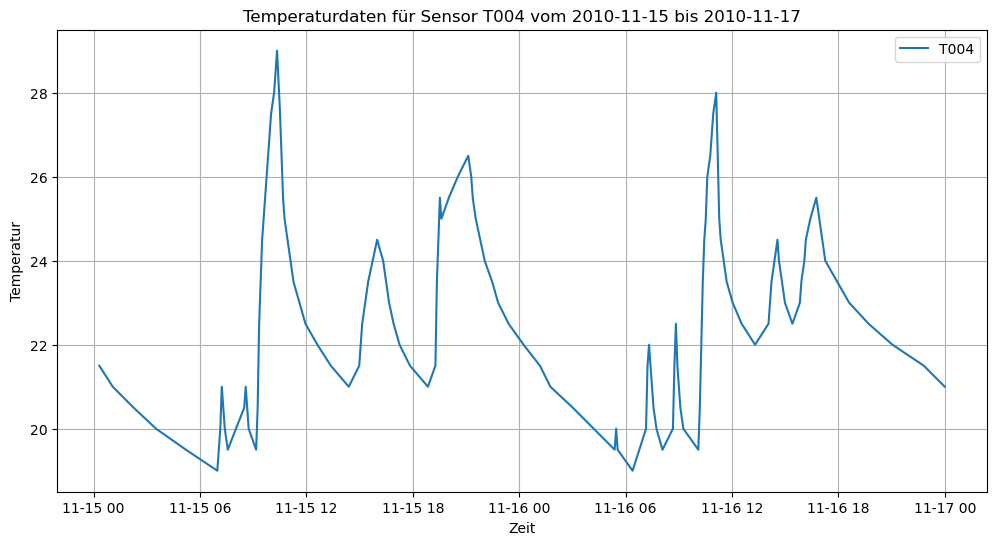

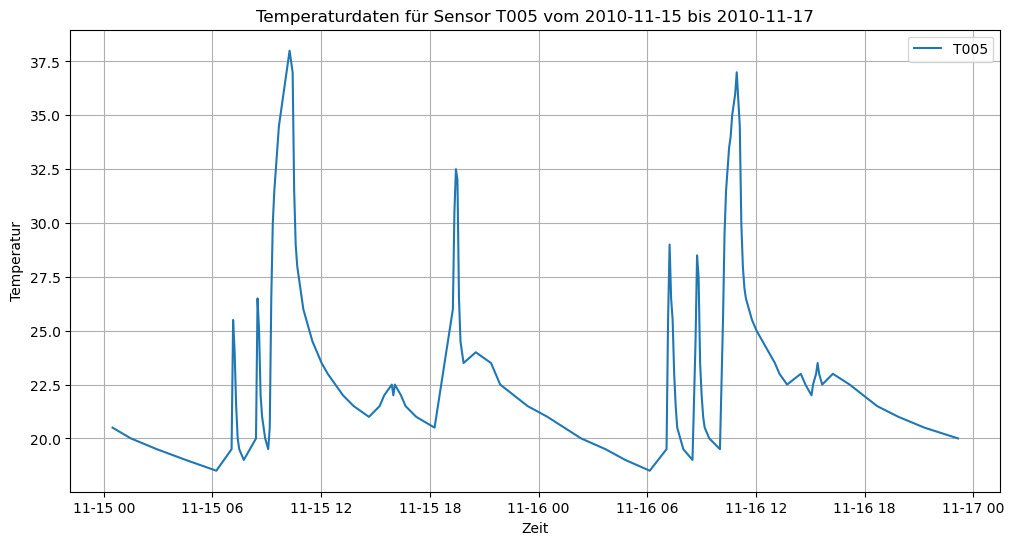

In [102]:
# Zeitspanne für Filterung angeben
start_date = "2010-11-15"
end_date = "2010-11-17"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_temperature_sensor['datetime'] = pd.to_datetime(df_temperature_sensor['date'] + ' ' + df_temperature_sensor['time'])

# Konvertiere die sensor_status-Spalte in numerische Werte
df_temperature_sensor['sensor_status'] = pd.to_numeric(df_temperature_sensor['sensor_status'], errors='coerce')

# Filtere die Daten für die ausgewählte Zeitspanne
filtered_data = df_temperature_sensor[
    (df_temperature_sensor['datetime'] >= pd.to_datetime(start_date)) &
    (df_temperature_sensor['datetime'] <= pd.to_datetime(end_date))
]

# Sortiere die gefilterten Daten
filtered_data = filtered_data.sort_values(by='datetime')

# Erstelle eine Liste der einzigartigen Sensoren, sortiert nach der Nummer im Namen (z. B. T001 zuerst)
unique_sensors = filtered_data['sensor_type'].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))  # Sortiere basierend auf der Zahl nach dem 'T'
# Erstelle ein Diagramm für jeden Temperatursensor in der sortierten Reihenfolge
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = filtered_data[filtered_data['sensor_type'] == sensor_id]
    
    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.plot(sensor_data['datetime'], sensor_data['sensor_status'], label=sensor_id)
    plt.title(f'Temperaturdaten für Sensor {sensor_id} vom {start_date} bis {end_date}')
    plt.xlabel('Zeit')
    plt.ylabel('Temperatur')
    plt.legend()
    plt.grid(True)
    plt.show()

/tmp/ipykernel_797/1207321924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_door_closure_sensor['datetime'] = pd.to_datetime(df_door_closure_sensor['date'] + ' ' + df_door_closure_sensor['time'])


,date,time,sensor_type,sensor_status,meta,meta_begin_end,datetime
900,2010-11-04,09:26:55.872002,D002,OPEN,NaN,NaN,2010-11-04 09:26:55.872002
910,2010-11-04,09:27:24.02731,D002,CLOSE,NaN,NaN,2010-11-04 09:27:24.027310
1050,2010-11-04,09:44:45.825736,D004,OPEN,NaN,NaN,2010-11-04 09:44:45.825736
1056,2010-11-04,09:46:07.572698,D004,CLOSE,NaN,NaN,2010-11-04 09:46:07.572698
2330,2010-11-04,11:41:11.940985,D001,OPEN,NaN,NaN,2010-11-04 11:41:11.940985
...,...,...,...,...,...,...,...
1717184,2011-06-11,15:49:27.091821,D002,CLOSE,NaN,NaN,2011-06-11 15:49:27.091821
1718385,2011-06-11,17:44:41.225887,D004,OPEN,NaN,NaN,2011-06-11 17:44:41.225887
1718394,2011-06-11,17:46:01.260041,D004,CLOSE,NaN,NaN,2011-06-11 17:46:01.260041
1719354,2011-06-11,21:18:22.395177,D004,OPEN,NaN,NaN,2011-06-11 21:18:22.395177


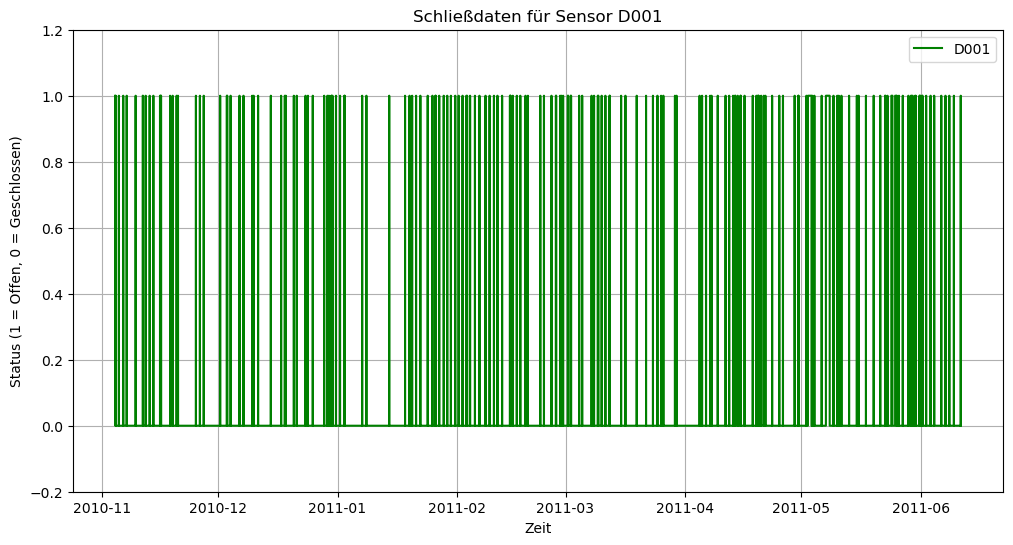

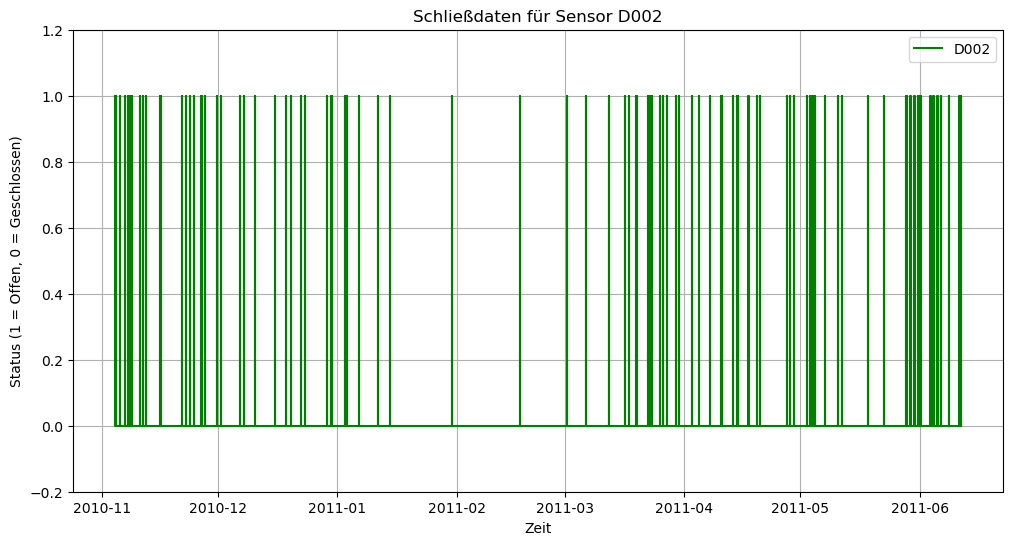

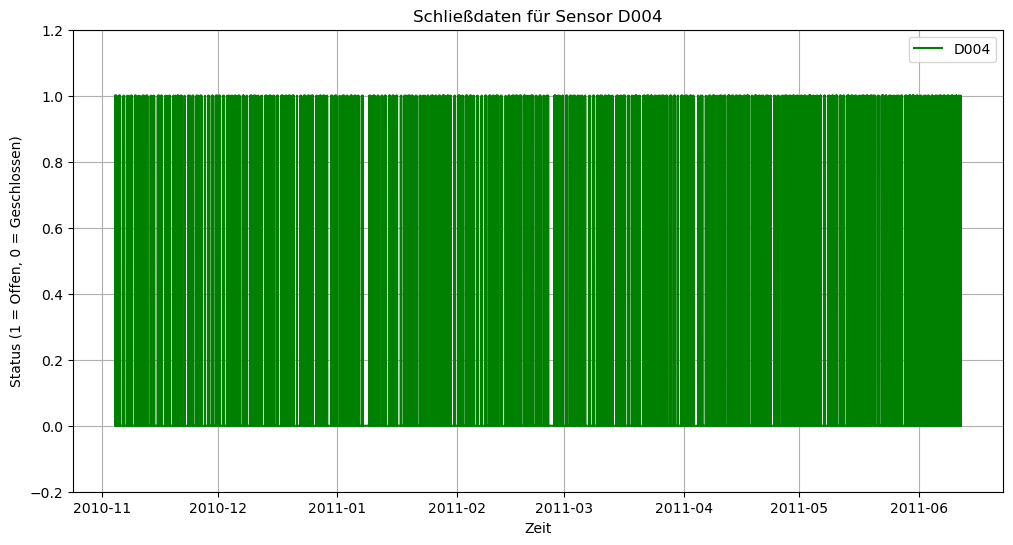

In [103]:
# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_door_closure_sensor['datetime'] = pd.to_datetime(df_door_closure_sensor['date'] + ' ' + df_door_closure_sensor['time'])

# Sortiere die Daten nach Datum und Uhrzeit
df_door_closure_sensor = df_door_closure_sensor.sort_values(by='datetime')
display(df_door_closure_sensor)

# Konvertiere sensor_status von OPEN/CLOSE zu numerischen Werten
status_mapping = {'OPEN': 1, 'CLOSE': 0}
df_door_closure_sensor['sensor_status_numeric'] = df_door_closure_sensor['sensor_status'].map(status_mapping)

# Erstelle eine Liste der einzigartigen Sensoren, sortiert nach der Nummer im Namen (z. B. D001 zuerst)
unique_sensors = df_door_closure_sensor['sensor_type'].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))

# Erstelle ein Diagramm für jeden Türschließsensor
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = df_door_closure_sensor[df_door_closure_sensor['sensor_type'] == sensor_id]
    
    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.step(sensor_data['datetime'], sensor_data['sensor_status_numeric'], where='post', label=sensor_id, color='green')
    plt.title(f'Schließdaten für Sensor {sensor_id}')
    plt.xlabel('Zeit')
    plt.ylabel('Status (1 = Offen, 0 = Geschlossen)')
    plt.ylim(-0.2, 1.2)  # Setze die Grenzen der y-Achse für bessere Lesbarkeit
    plt.legend()
    plt.grid(True)
    plt.show()




/tmp/ipykernel_797/765210683.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sensor_status_numeric'] = filtered_data['sensor_status'].map(status_mapping)


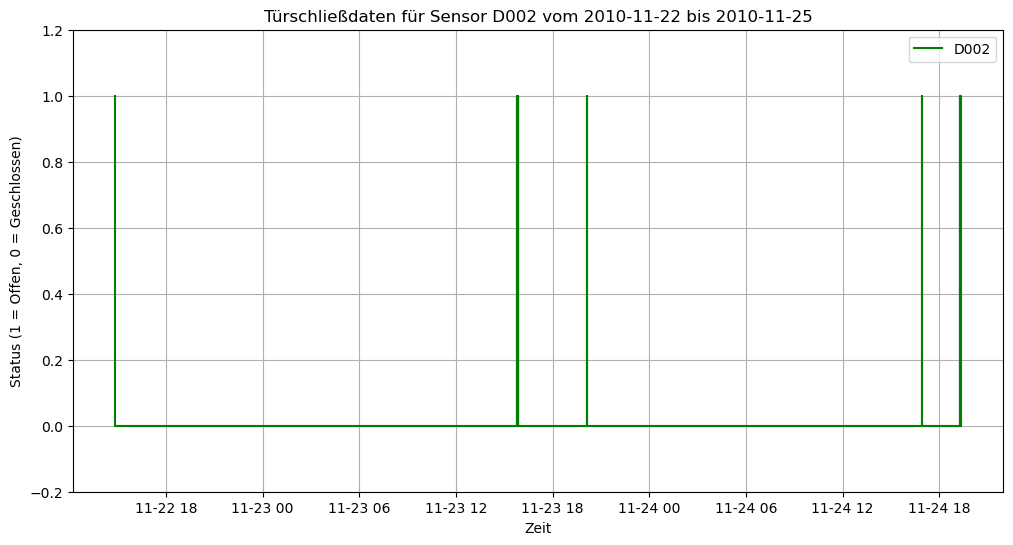

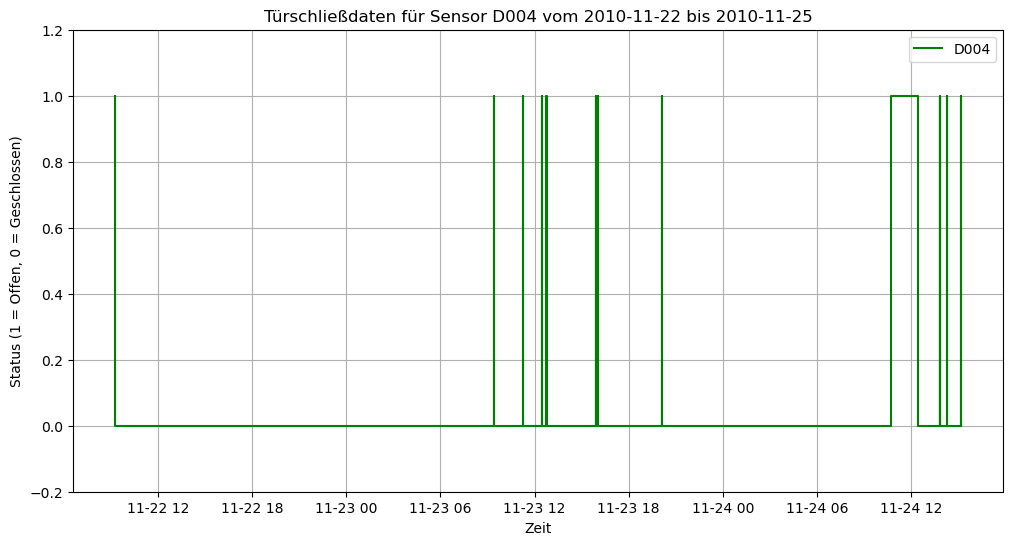

In [104]:
# Zeitspanne angeben
start_date = "2010-11-22"
end_date = "2010-11-25"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt
df_door_closure_sensor['datetime'] = pd.to_datetime(df_door_closure_sensor['date'] + ' ' + df_door_closure_sensor['time'], format="ISO8601")

# Filtere die Daten für die angegebene Zeitspanne
filtered_data = df_door_closure_sensor[
    (df_door_closure_sensor['datetime'] >= pd.to_datetime(start_date)) &
    (df_door_closure_sensor['datetime'] <= pd.to_datetime(end_date))
]
# Konvertiere sensor_status von OPEN/CLOSE zu numerischen Werten
status_mapping = {'OPEN': 1, 'CLOSE': 0}
filtered_data['sensor_status_numeric'] = filtered_data['sensor_status'].map(status_mapping)

# Sortiere die Daten nach Datum und Uhrzeit
filtered_data = filtered_data.sort_values(by='datetime')

# Erstelle eine Liste der einzigartigen Sensoren, sortiert nach der Nummer im Namen (z. B. D001 zuerst)
unique_sensors = filtered_data['sensor_type'].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))

# Erstelle ein Diagramm für jeden Türschließsensor in der angegebenen Zeitspanne
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = filtered_data[filtered_data['sensor_type'] == sensor_id]
    
    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.step(sensor_data['datetime'], sensor_data['sensor_status_numeric'], where='post', label=sensor_id, color='green')
    #display(sensor_data['datetime'])
    plt.title(f'Türschließdaten für Sensor {sensor_id} vom {start_date} bis {end_date}')
    plt.xlabel('Zeit')
    plt.ylabel('Status (1 = Offen, 0 = Geschlossen)')
    plt.ylim(-0.2, 1.2)  # Setze die Grenzen der y-Achse für bessere Lesbarkeit
    plt.legend()
    plt.grid(True)
    plt.show()

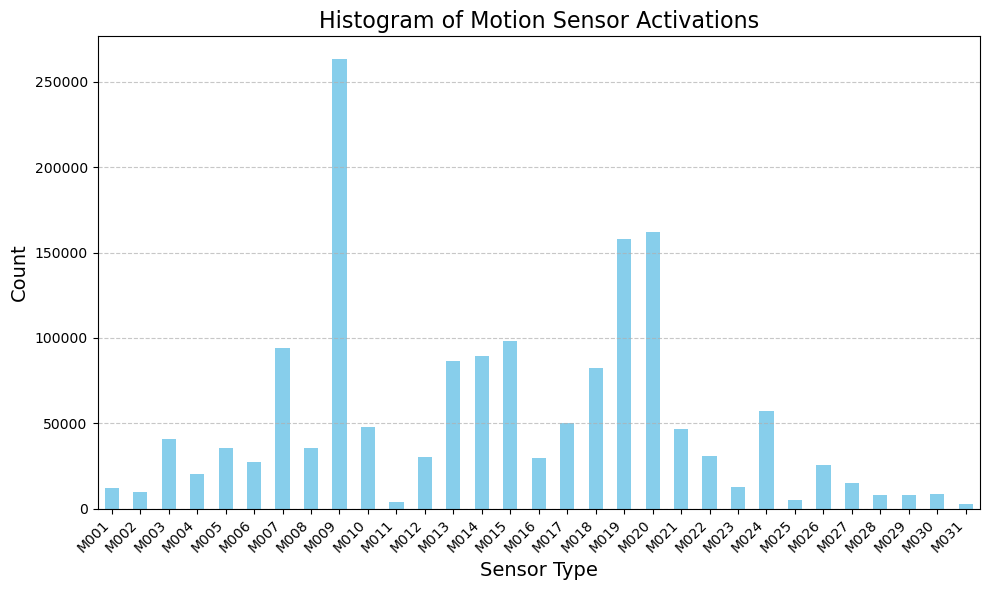

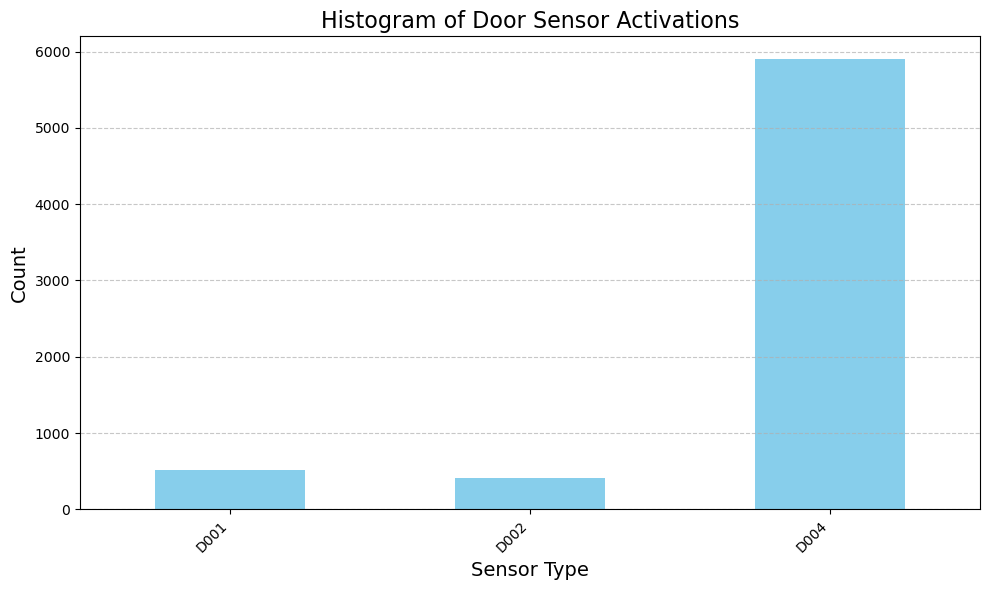

In [105]:
# Histogramm
# Plot histogram for the simulated df_motion_sensor
plt.figure(figsize=(10, 6))
motion_sensor_counts = df_motion_sensor["sensor_type"].value_counts().sort_index()
motion_sensor_counts.plot(kind="bar", color="skyblue")
plt.title("Histogram of Motion Sensor Activations", fontsize=16)
plt.xlabel("Sensor Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
# Plot histogram for the simulated df_motion_sensor
plt.figure(figsize=(10, 6))
door_sensor_counts = df_door_closure_sensor["sensor_type"].value_counts().sort_index()
door_sensor_counts.plot(kind="bar", color="skyblue")
plt.title("Histogram of Door Sensor Activations", fontsize=16)
plt.xlabel("Sensor Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_797/2083949509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motion_sensor['datetime'] = pd.to_datetime(df_motion_sensor['date'] + ' ' + df_motion_sensor['time'], format="ISO8601")


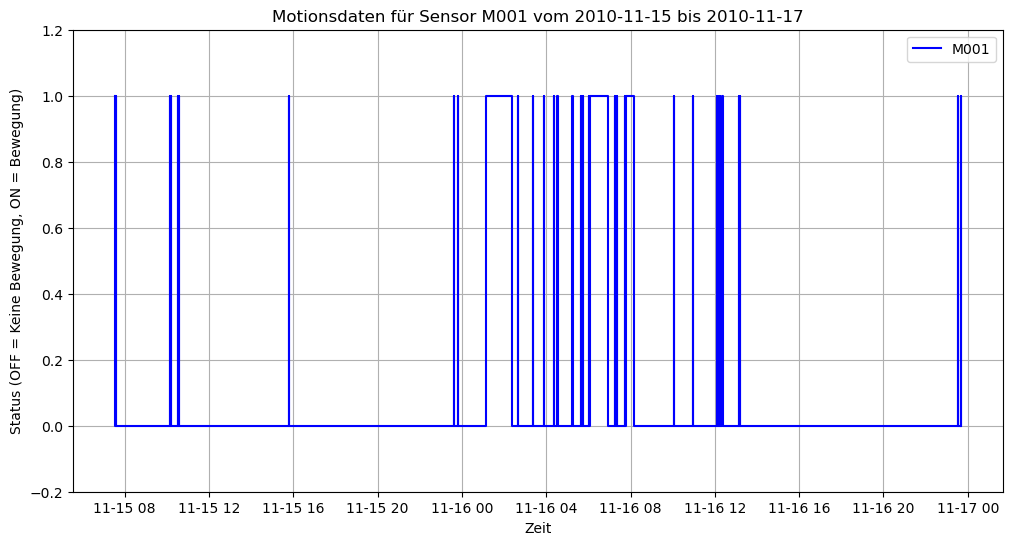

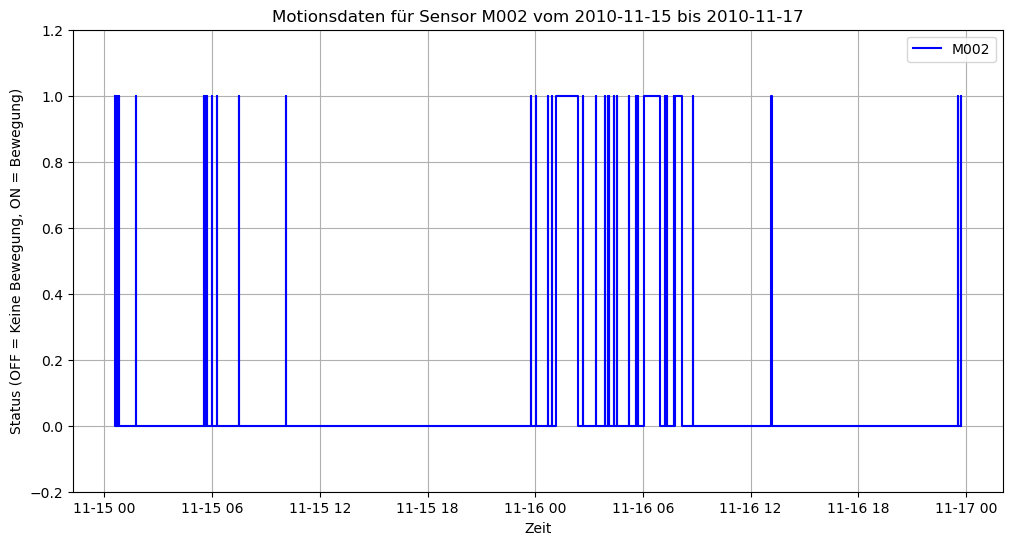

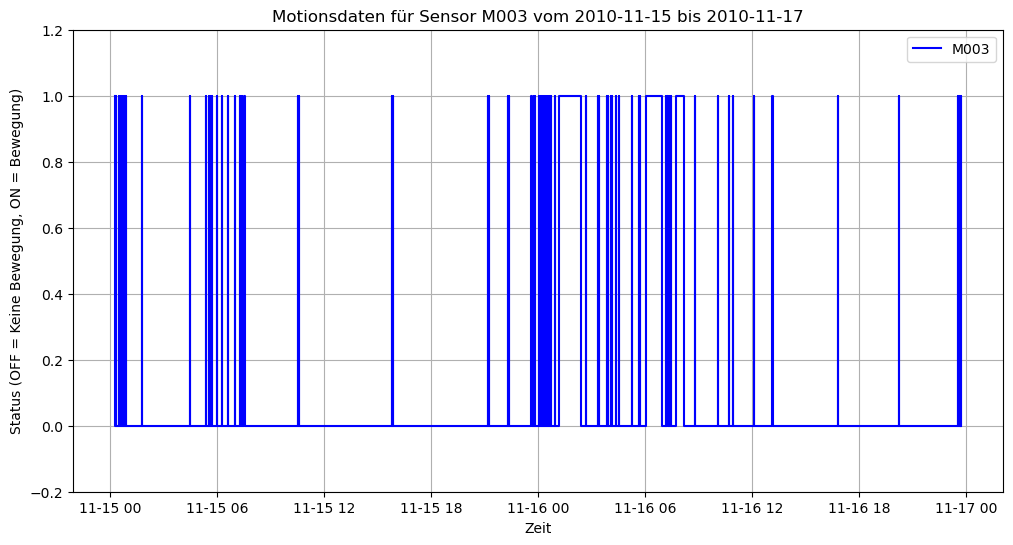

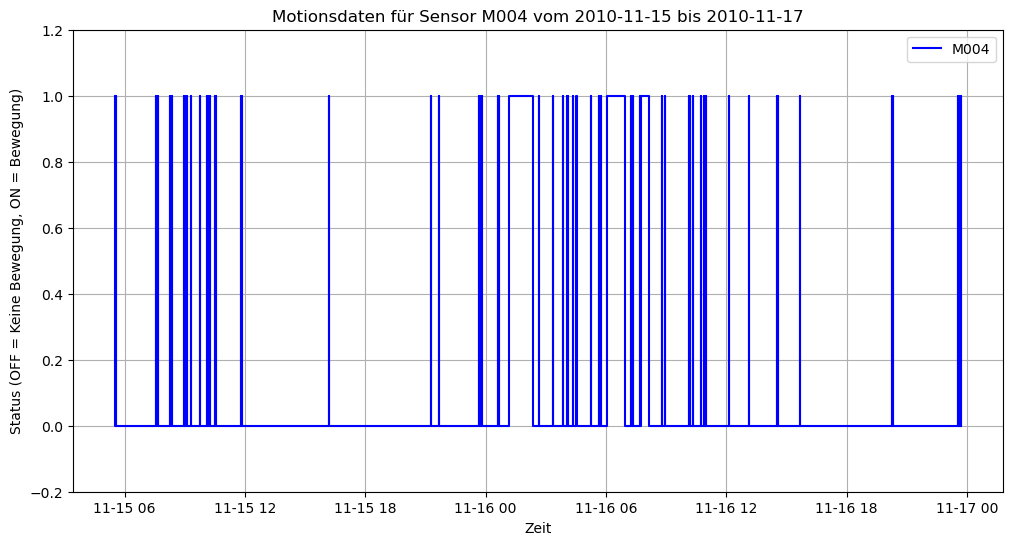

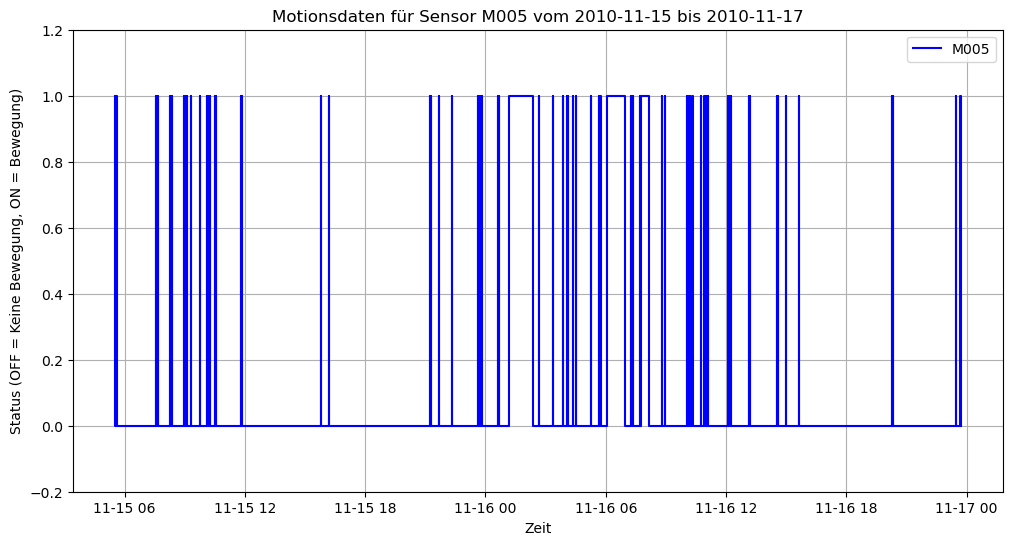

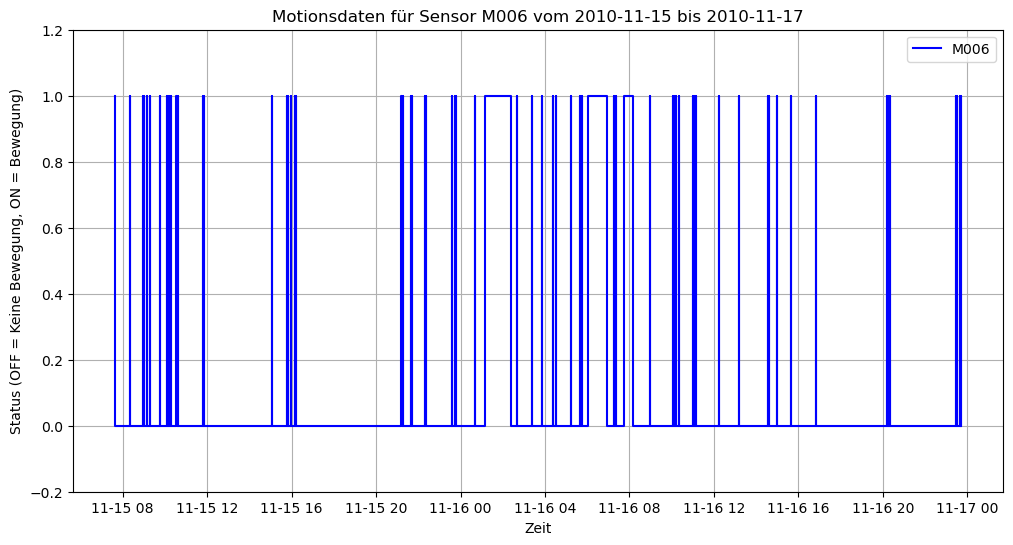

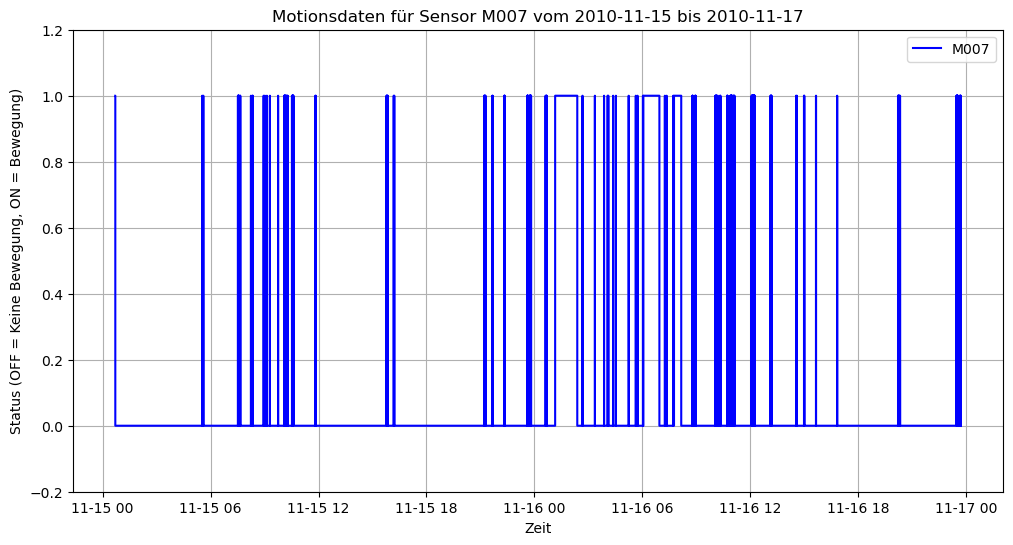

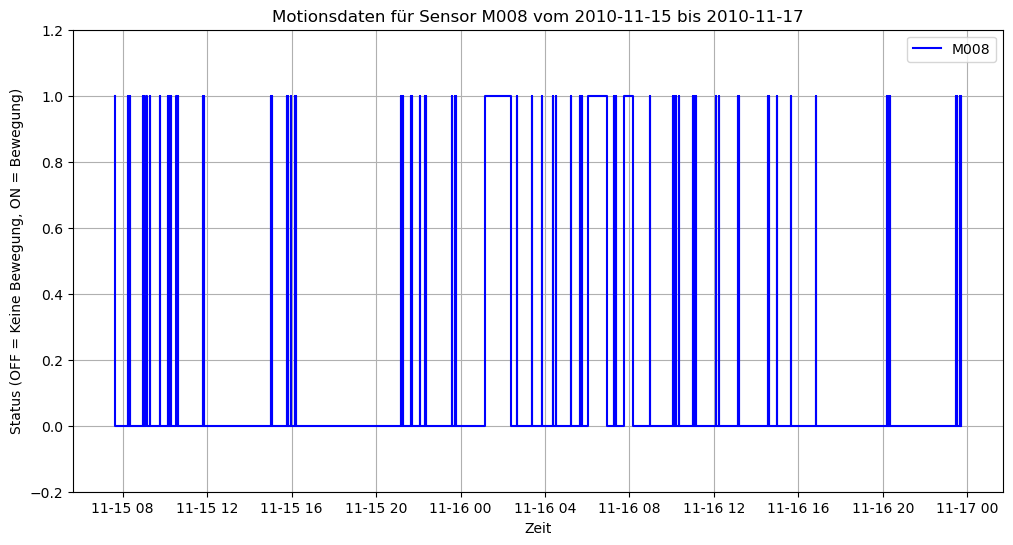

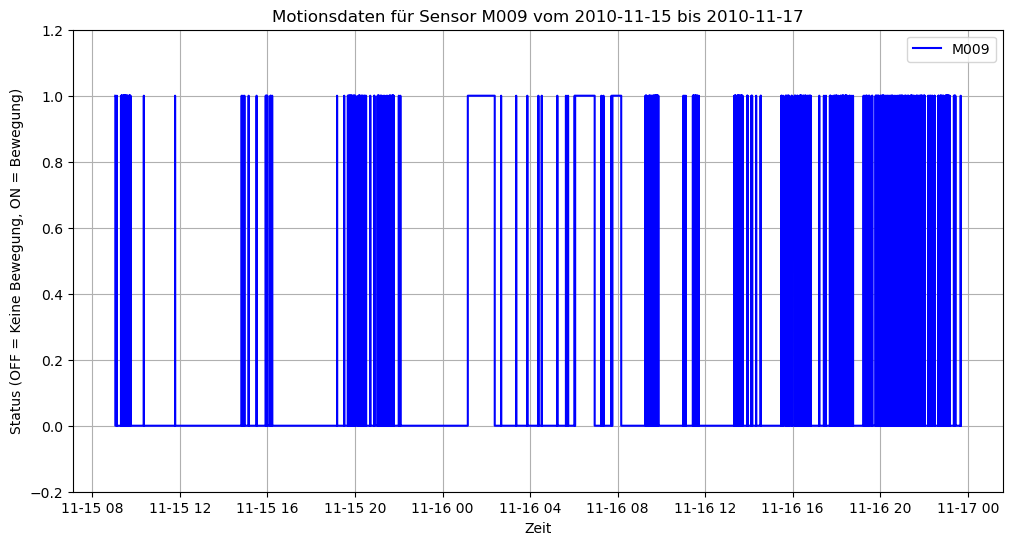

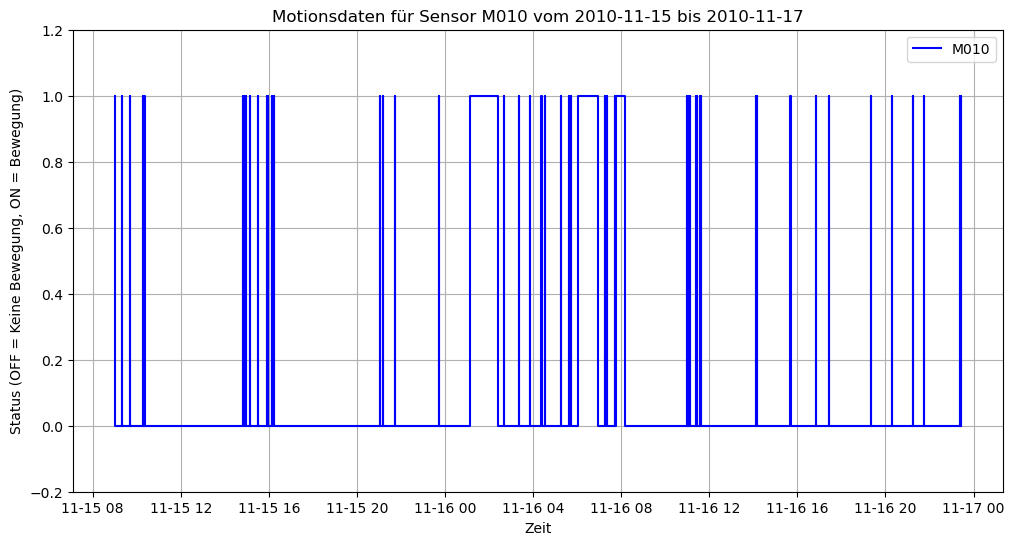

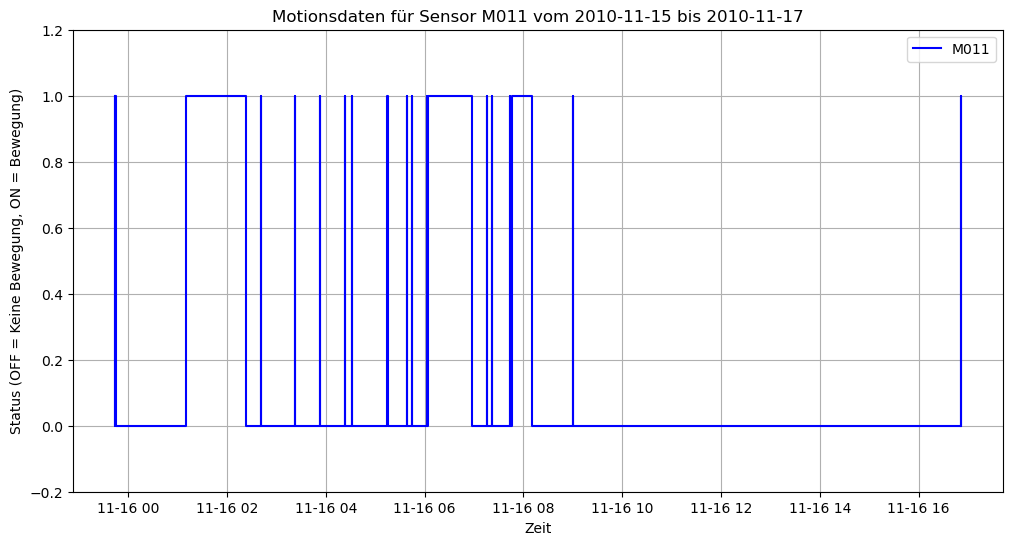

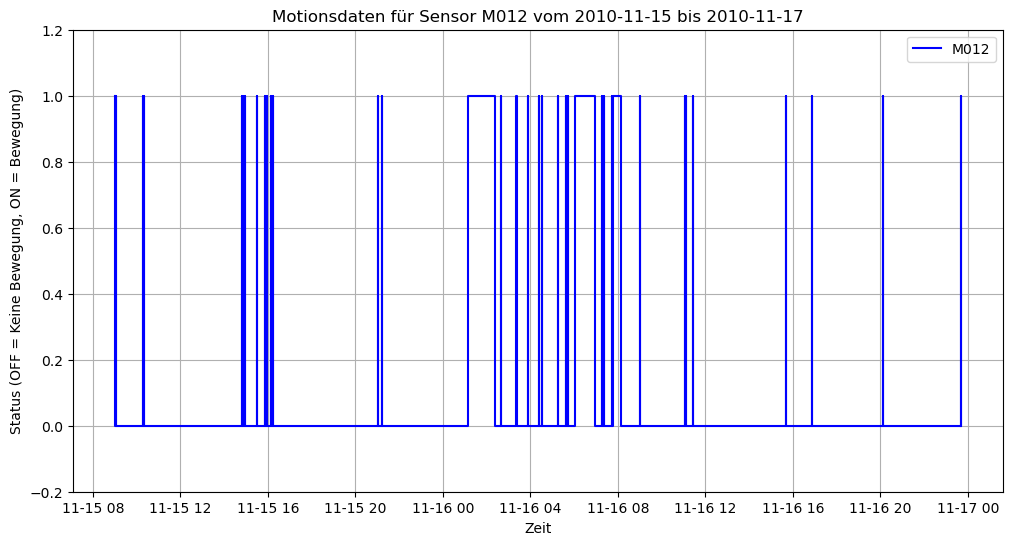

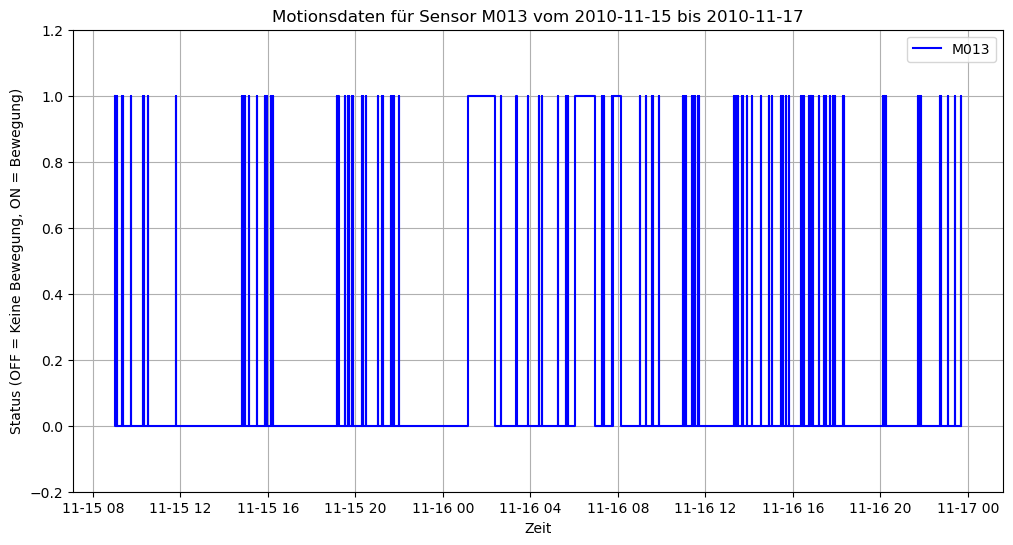

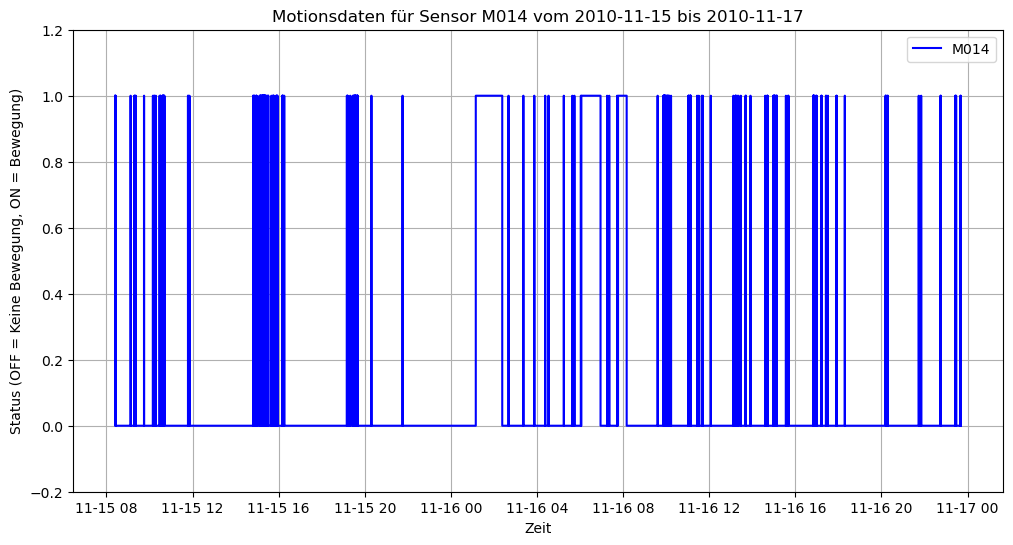

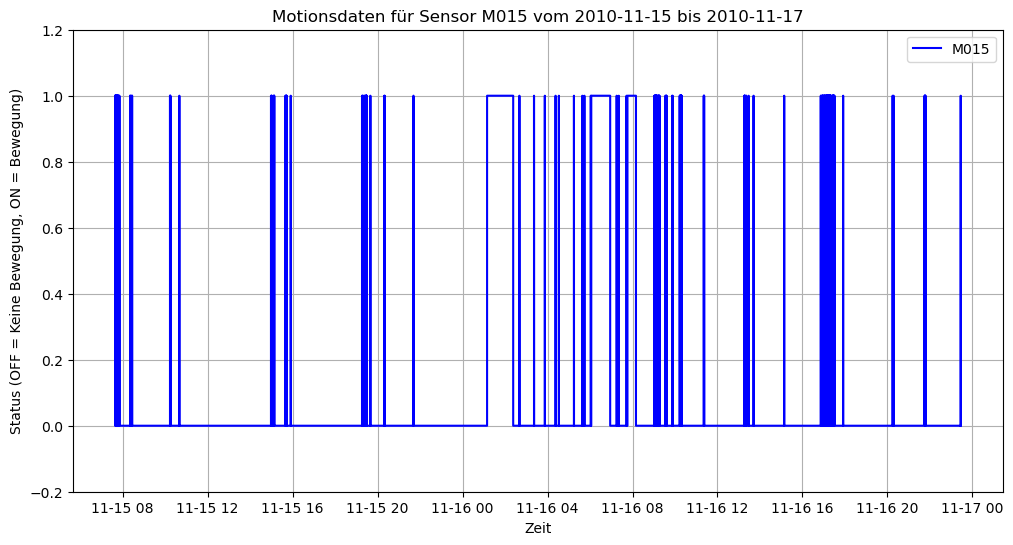

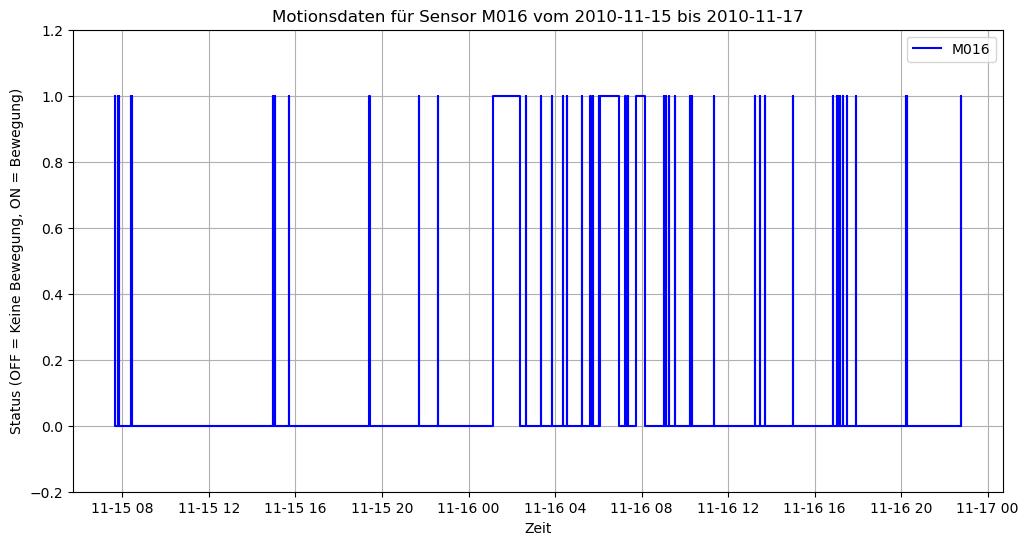

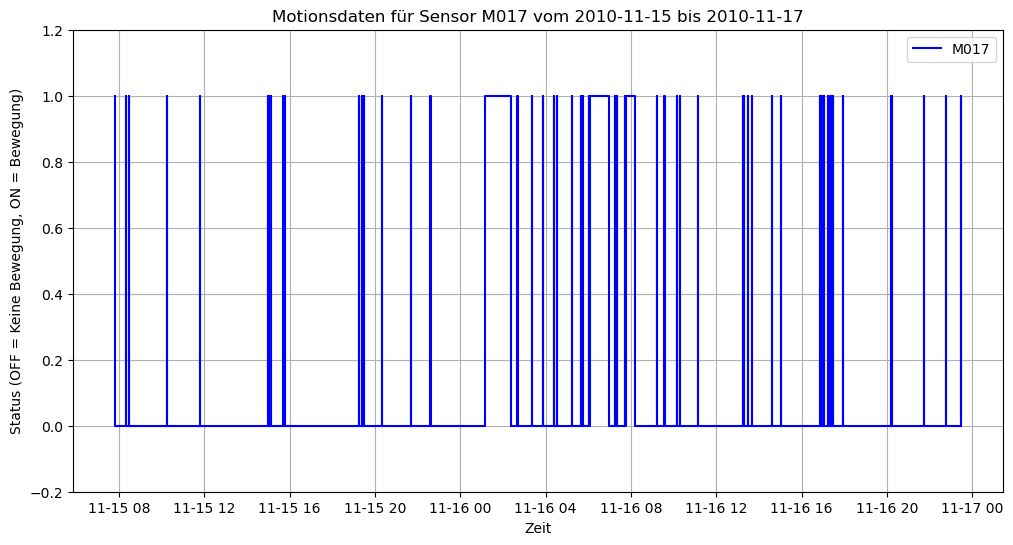

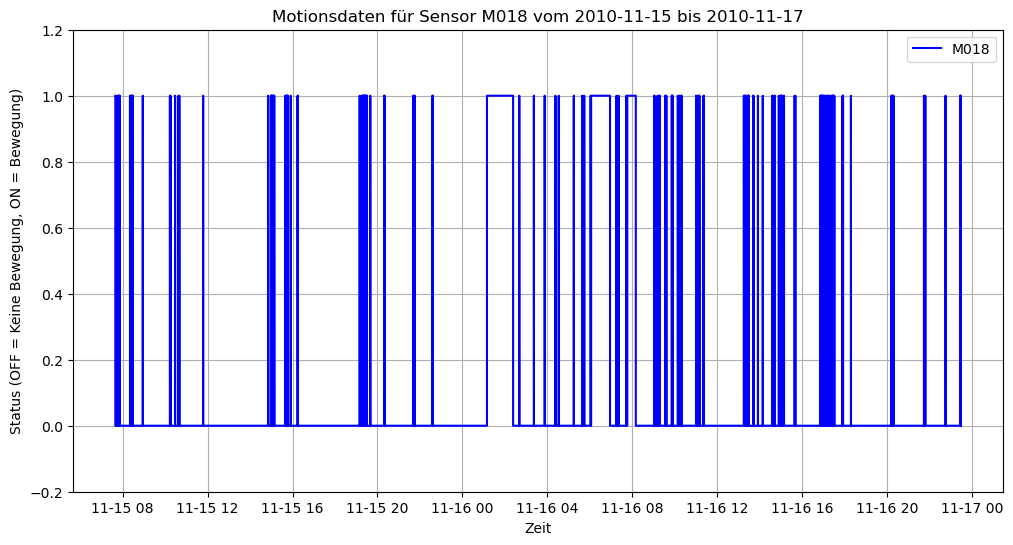

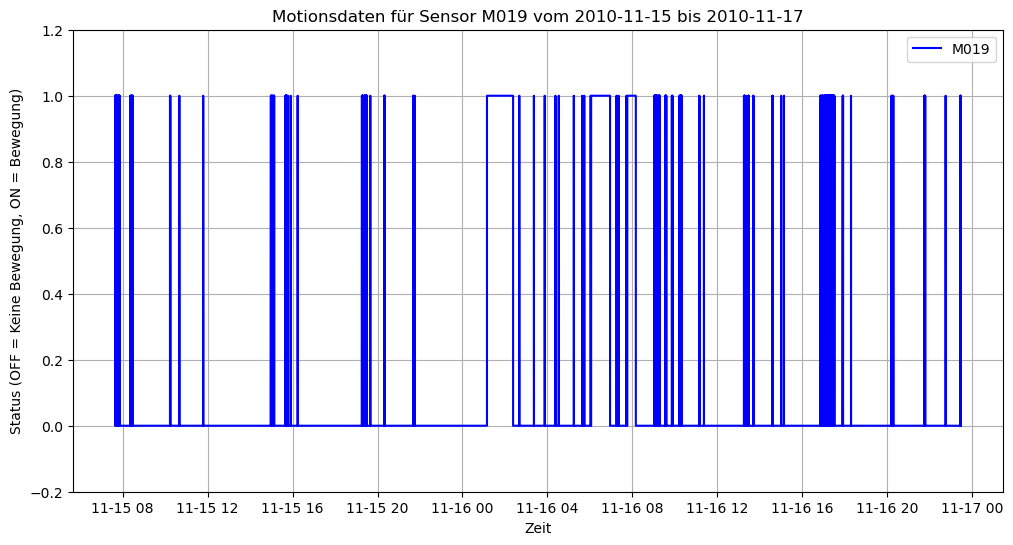

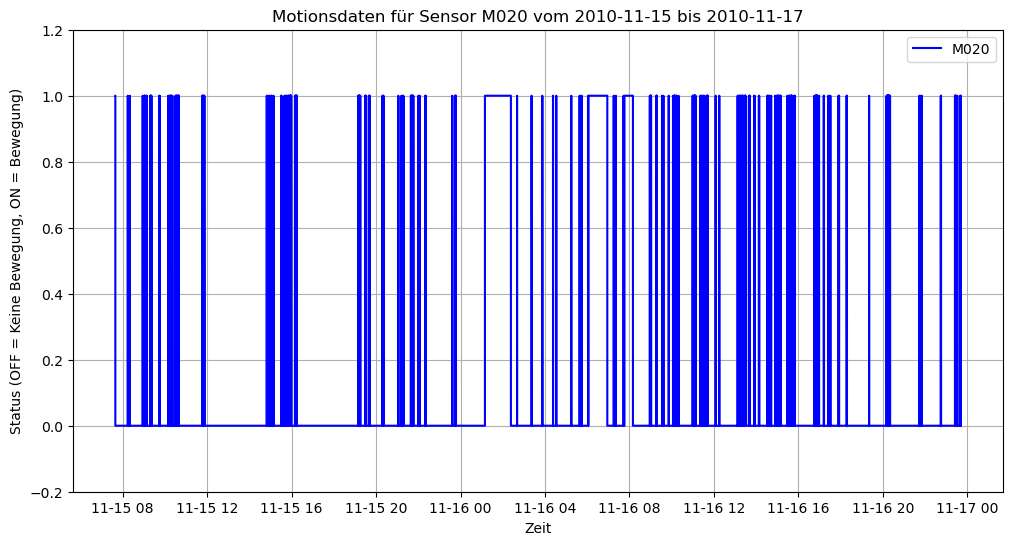

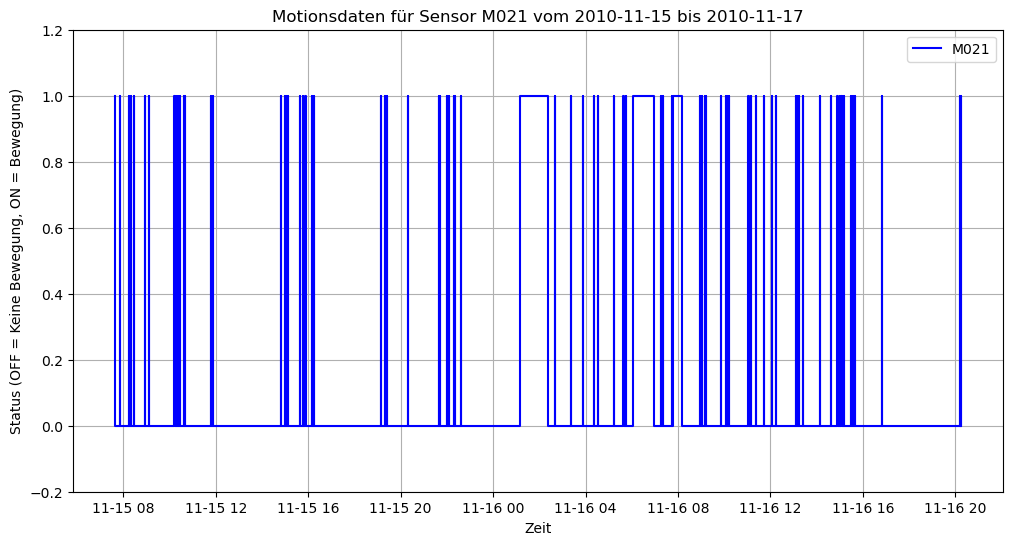

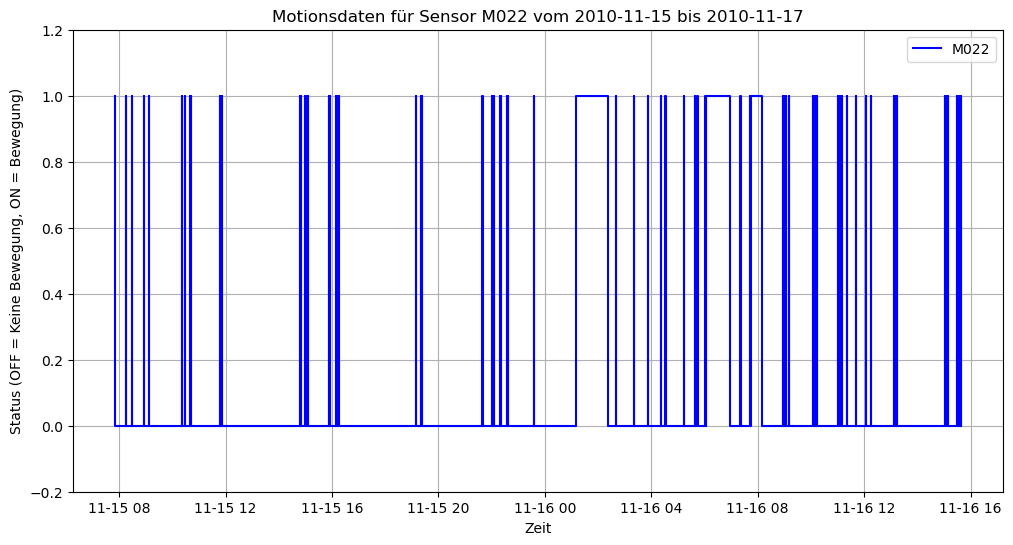

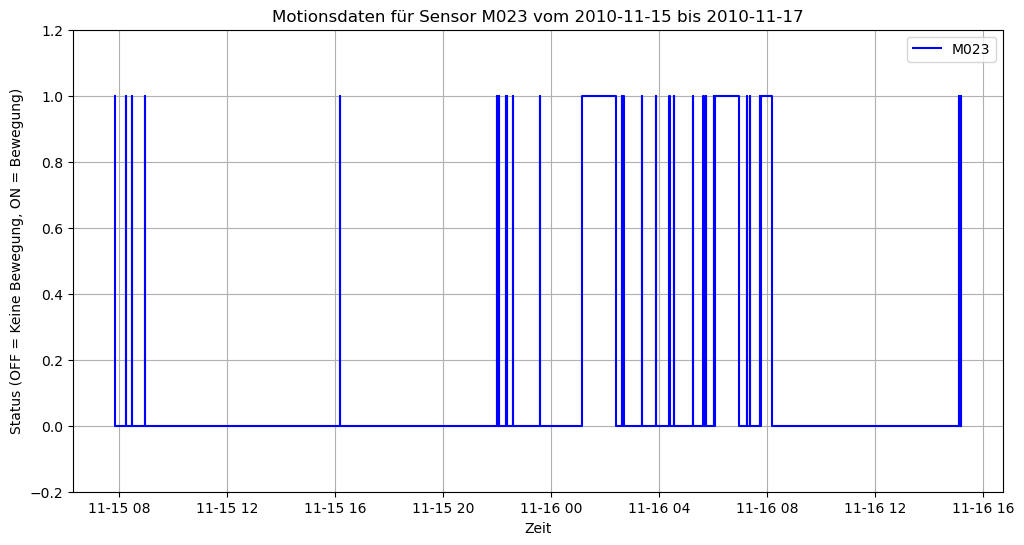

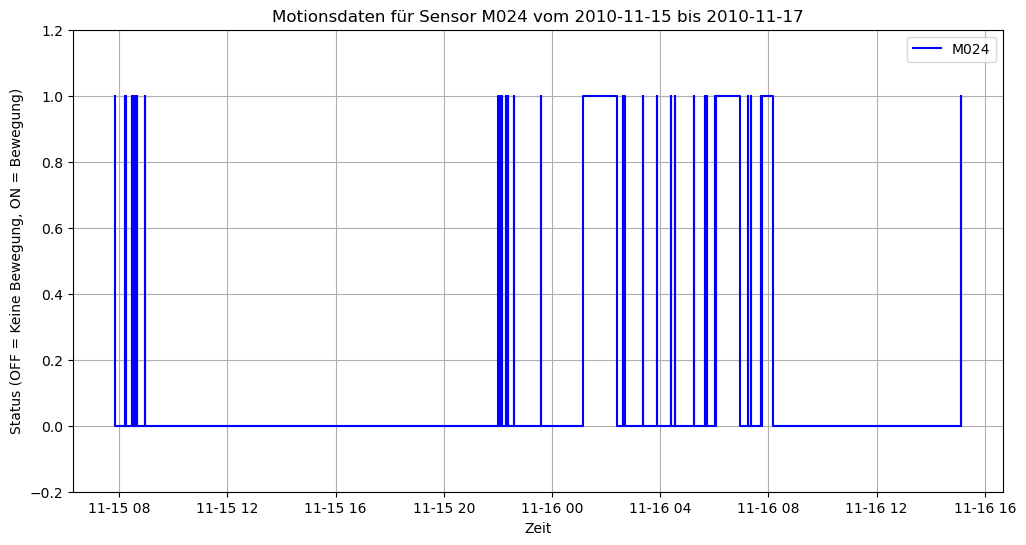

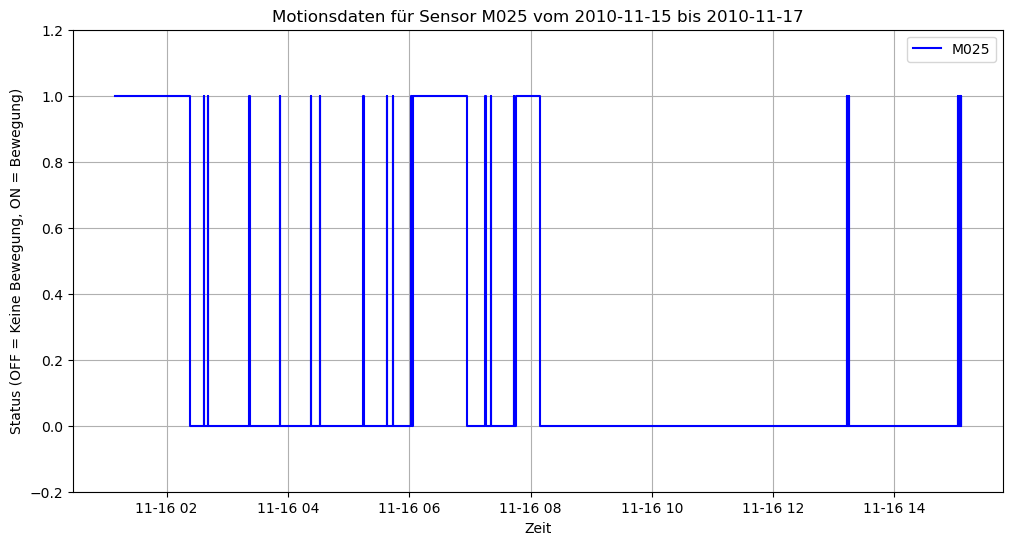

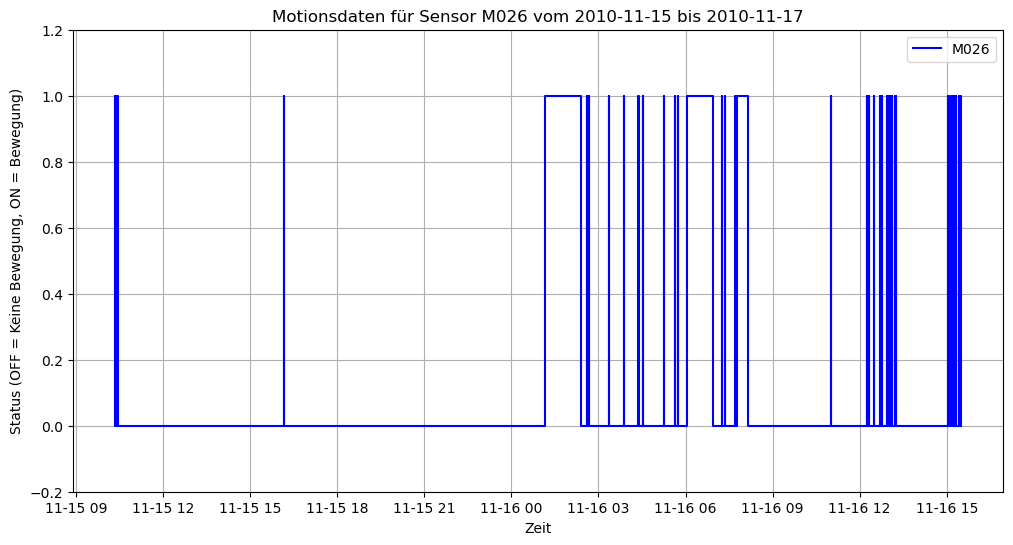

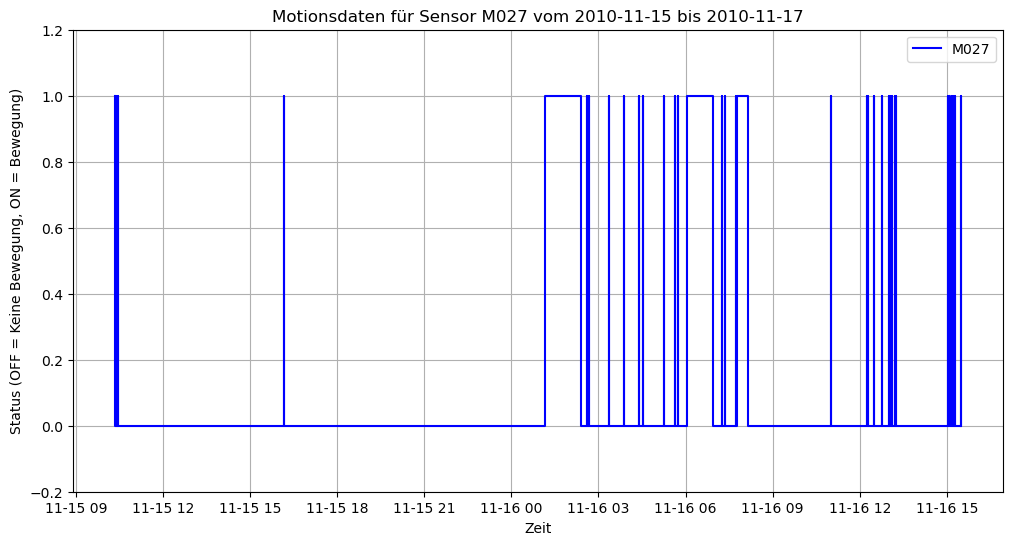

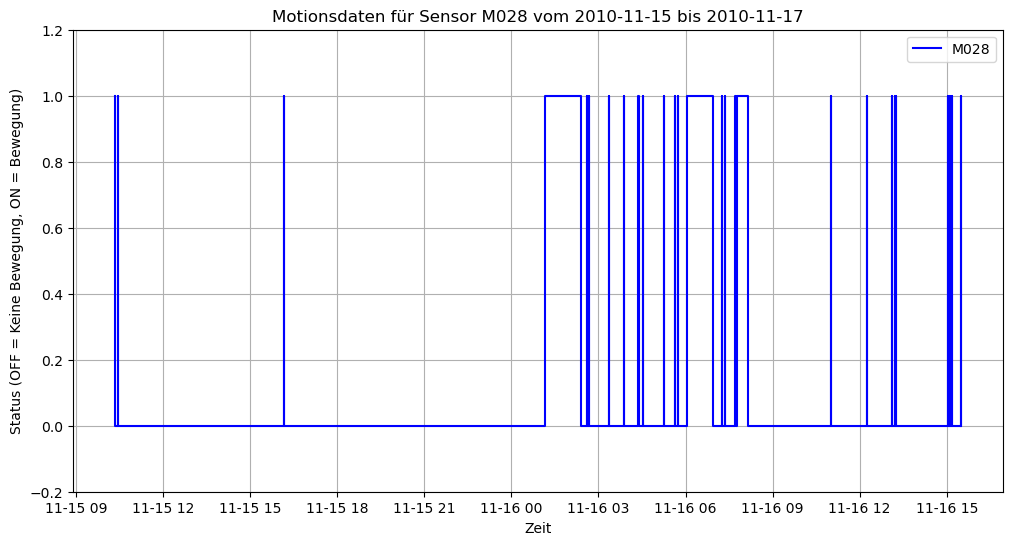

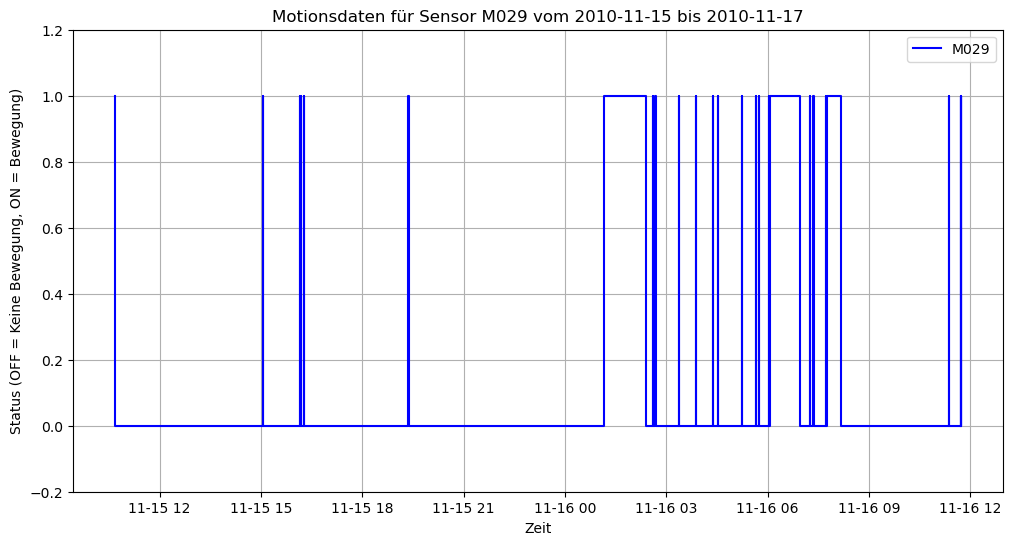

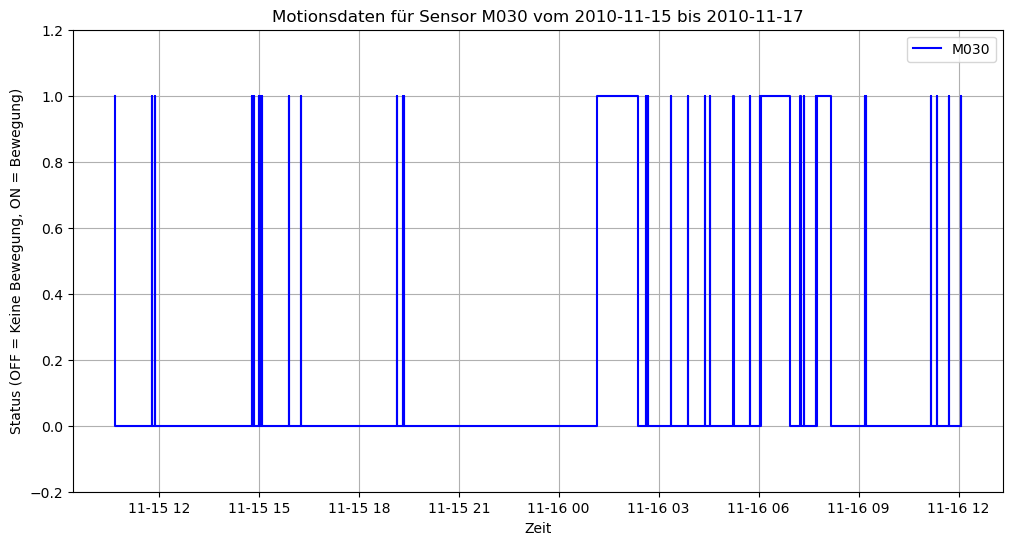

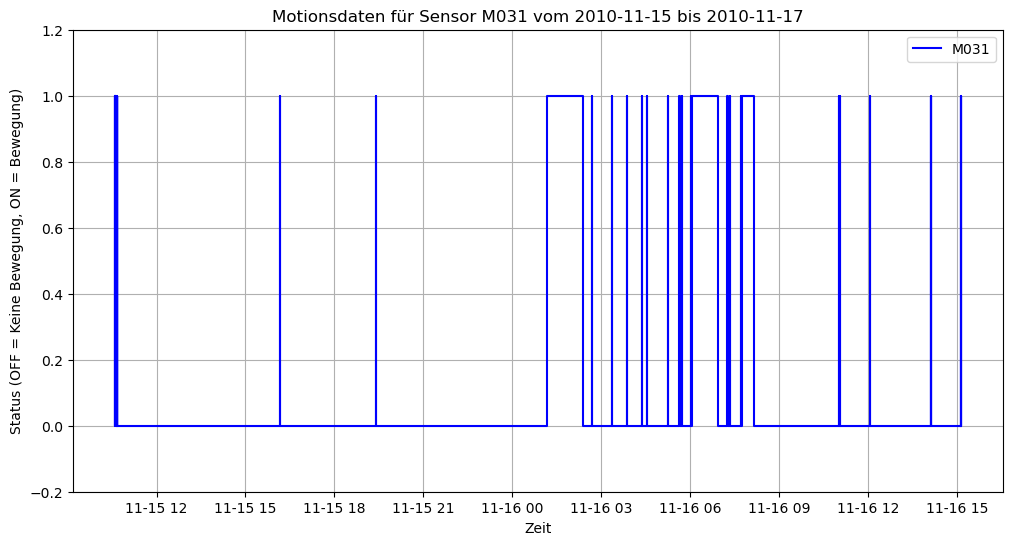

In [106]:
# Beispiel Start- und Endzeit für die Zeitspanne
start_date = "2010-11-15"
end_date = "2010-11-17"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt für Bewegungssensoren
# Hier explizit das Format angeben
df_motion_sensor['datetime'] = pd.to_datetime(df_motion_sensor['date'] + ' ' + df_motion_sensor['time'], format="ISO8601")

# Filtere die Daten für die ausgewählte Zeitspanne
df_motion_sensor = df_motion_sensor[
    (df_motion_sensor['datetime'] >= pd.to_datetime(start_date)) &
    (df_motion_sensor['datetime'] <= pd.to_datetime(end_date))
]

# Sortiere die Daten nach Datum und Uhrzeit
df_motion_sensor = df_motion_sensor.sort_values(by='datetime')

# Konvertiere sensor_status von OPEN/CLOSE zu numerischen Werten (0 = Keine Bewegung, 1 = Bewegung)
status_mapping = {'OFF': 0, 'ON': 1}  # Hier gehe ich davon aus, dass 'OPEN' keine Bewegung bedeutet, 'CLOSE' Bewegung
df_motion_sensor['sensor_status_numeric'] = df_motion_sensor['sensor_status'].map(status_mapping)

# Erstelle eine Liste der einzigartigen Bewegungssensoren, sortiert nach der Nummer im Namen (z. B. M001 zuerst)
unique_sensors = df_motion_sensor['sensor_type'].unique()
sorted_sensors = sorted(unique_sensors, key=lambda x: int(x[1:]))

# Erstelle ein Diagramm für jeden Bewegungssensor
for sensor_id in sorted_sensors:
    # Daten für den aktuellen Sensor filtern
    sensor_data = df_motion_sensor[df_motion_sensor['sensor_type'] == sensor_id]
    
    # Neues Diagramm erstellen
    plt.figure(figsize=(12, 6))
    plt.step(sensor_data['datetime'], sensor_data['sensor_status_numeric'], where='post', label=sensor_id, color='blue')
    plt.title(f'Motionsdaten für Sensor {sensor_id} vom {start_date} bis {end_date}')
    plt.xlabel('Zeit')
    plt.ylabel('Status (OFF = Keine Bewegung, ON = Bewegung)')
    plt.ylim(-0.2, 1.2)  # Setze die Grenzen der y-Achse für bessere Lesbarkeit
    plt.legend()
    plt.grid(True)
    plt.show()


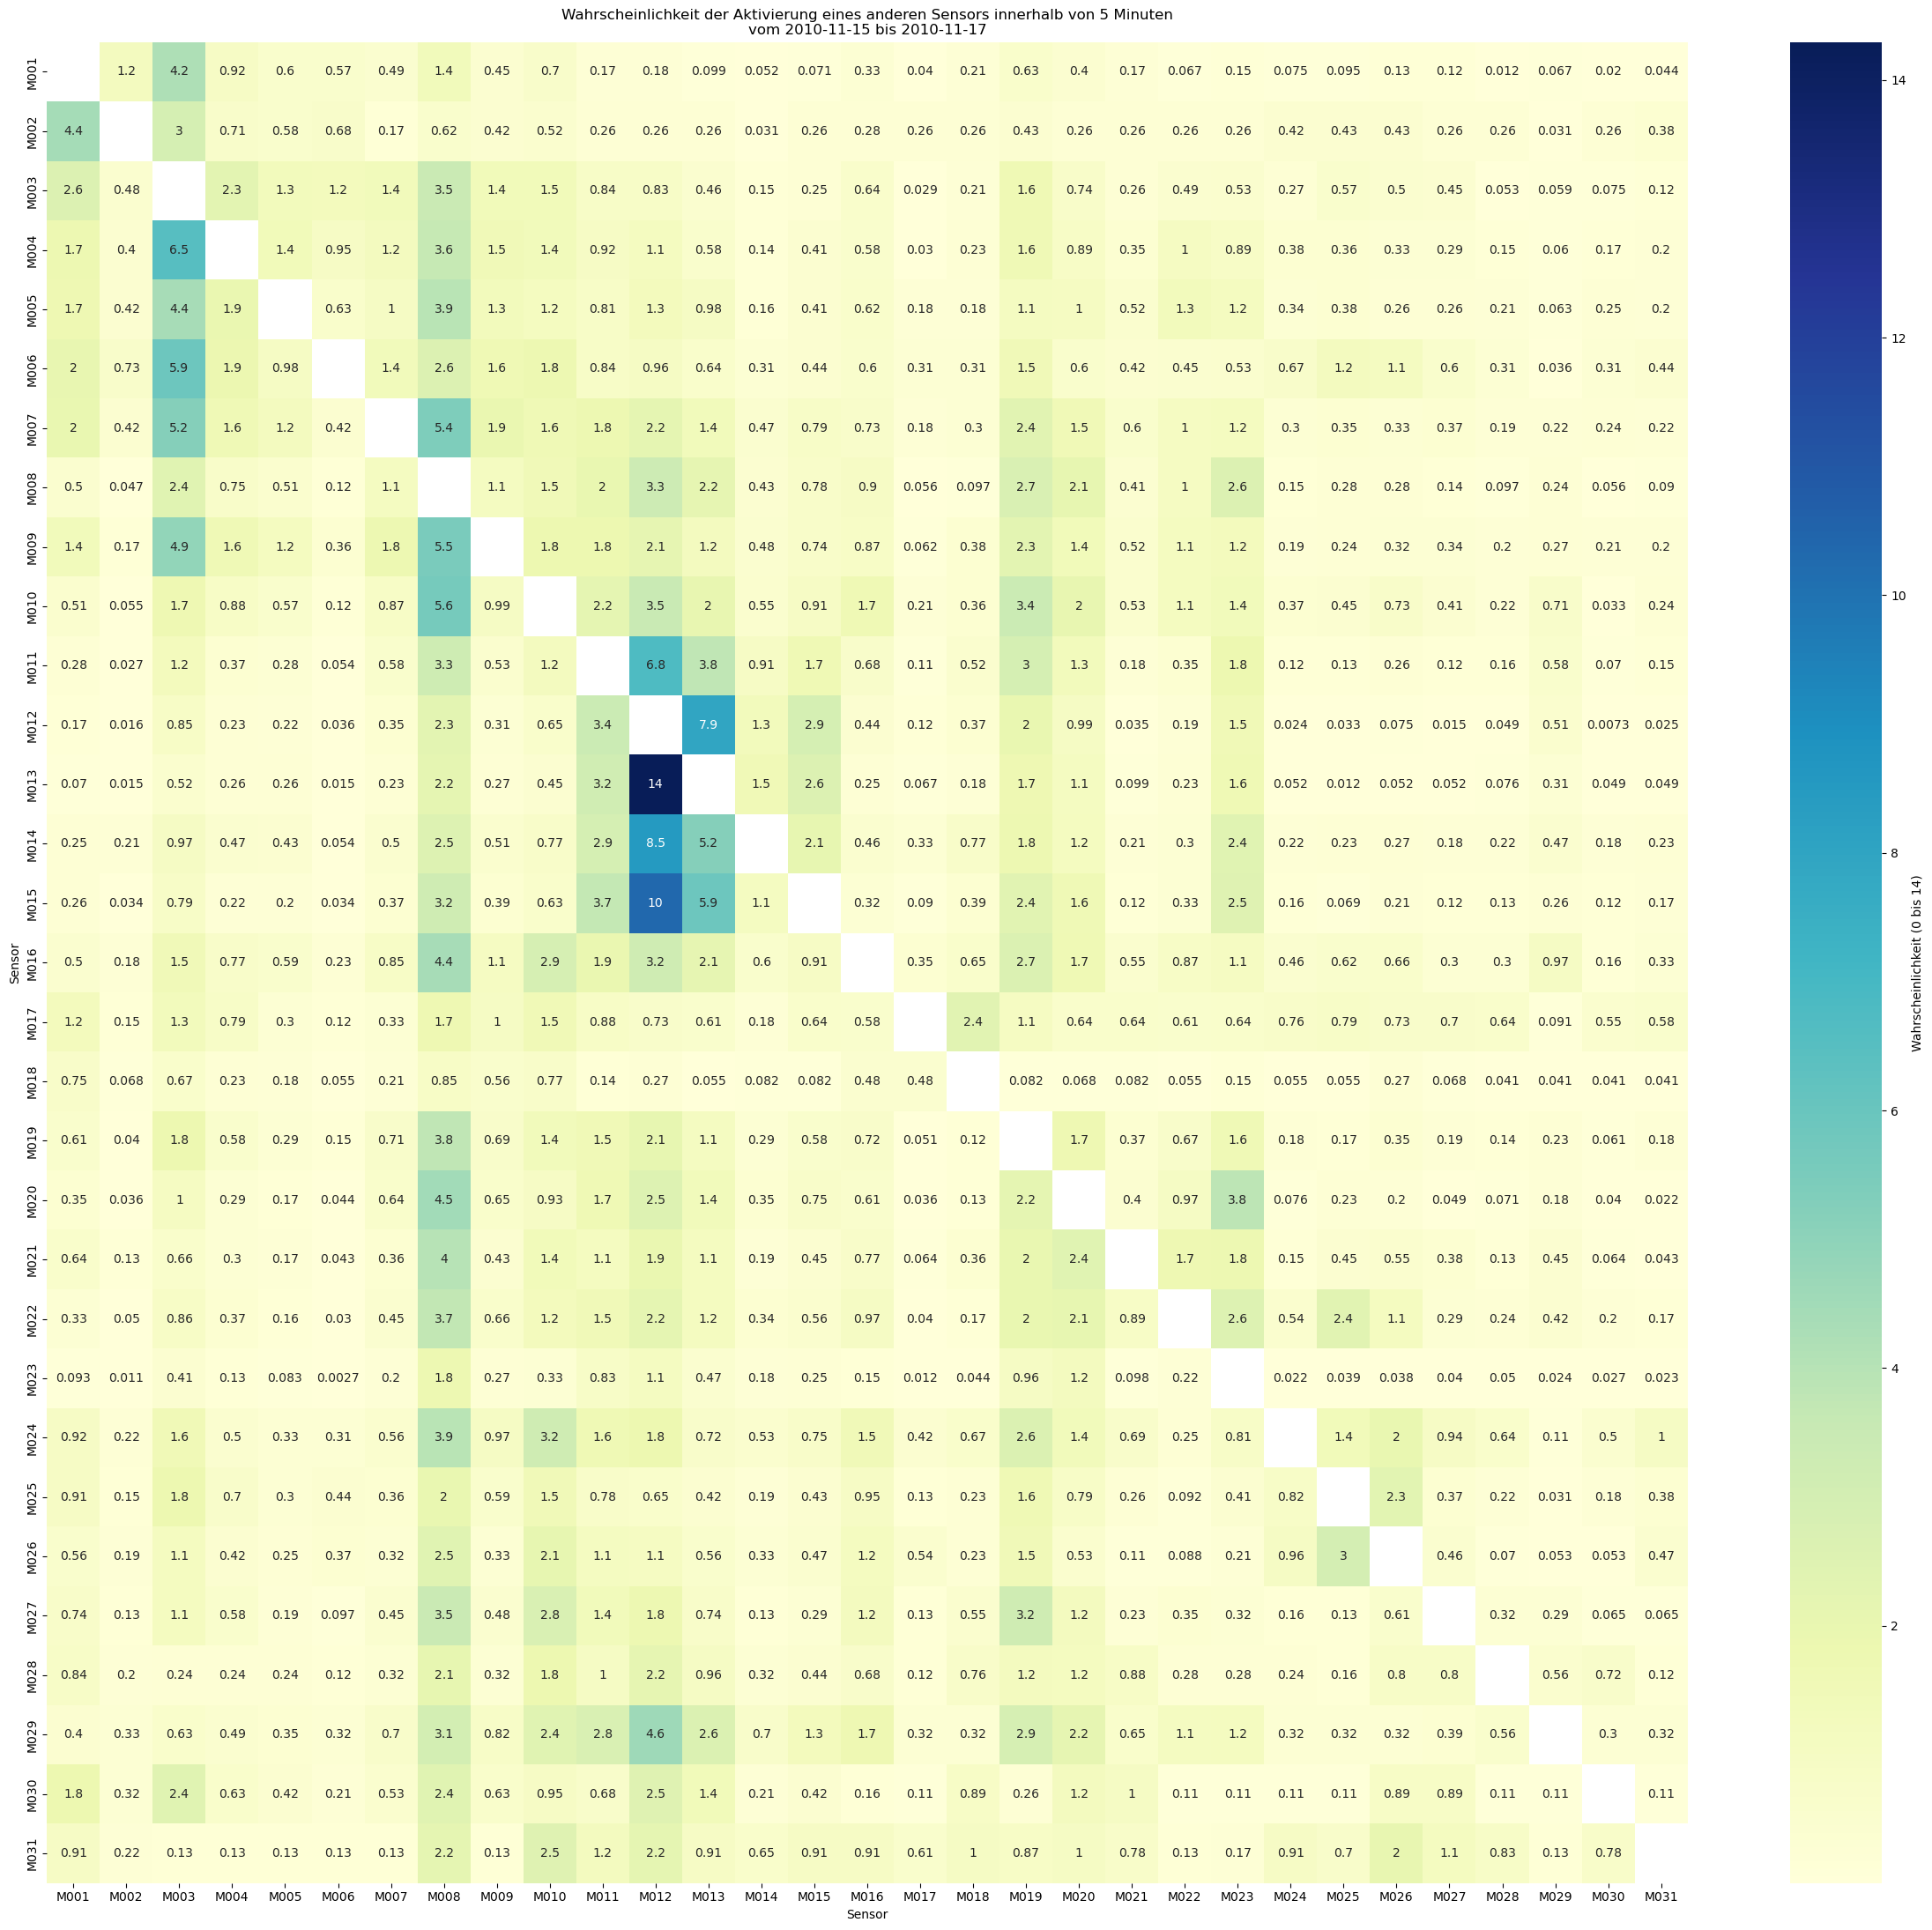

In [107]:

# Beispiel Start- und Endzeit für die Zeitspanne
start_date = "2010-11-15"
end_date = "2010-11-17"

# Konvertiere Datum und Uhrzeit in eine einzige Spalte mit einem Datetime-Objekt für Bewegungssensoren
df_motion_sensor['datetime'] = pd.to_datetime(df_motion_sensor['date'] + ' ' + df_motion_sensor['time'], format="ISO8601")

# Filtere die Daten für die ausgewählte Zeitspanne
df_motion_sensor = df_motion_sensor[
    (df_motion_sensor['datetime'] >= pd.to_datetime(start_date)) &
    (df_motion_sensor['datetime'] <= pd.to_datetime(end_date))
]

# Konvertiere sensor_status von OFF/ON zu numerischen Werten (0 = Keine Bewegung, 1 = Bewegung)
status_mapping = {'OFF': 0, 'ON': 1}  # 'OFF' = Keine Bewegung, 'ON' = Bewegung
df_motion_sensor['sensor_status_numeric'] = df_motion_sensor['sensor_status'].map(status_mapping)

# Erstelle eine Liste der einzigartigen Bewegungssensoren
unique_sensors = df_motion_sensor['sensor_type'].unique()

# Definiere das Zeitfenster (5 Minuten)
time_window = pd.Timedelta(minutes=5)

# DataFrame für die Häufigkeiten der Sensor-Aktivierungen nach 5 Minuten
probabilities = pd.DataFrame(columns=unique_sensors, index=unique_sensors)

# Berechne die Wahrscheinlichkeit, dass ein Sensor in den nächsten 5 Minuten aktiviert wird
for sensor_id in unique_sensors:
    # Daten für den aktuellen Sensor filtern (nur 'ON' Zustände)
    sensor_data = df_motion_sensor[df_motion_sensor['sensor_type'] == sensor_id]
    sensor_on_times = sensor_data[sensor_data['sensor_status_numeric'] == 1]['datetime']

    for other_sensor_id in unique_sensors:
        if sensor_id == other_sensor_id:
            continue  # Ignoriere den gleichen Sensor

        # Daten für den anderen Sensor filtern (nur 'ON' Zustände)
        other_sensor_data = df_motion_sensor[df_motion_sensor['sensor_type'] == other_sensor_id]
        other_sensor_on_times = other_sensor_data[other_sensor_data['sensor_status_numeric'] == 1]['datetime']

        # Zähle, wie oft der andere Sensor innerhalb von 5 Minuten nach dem aktuellen Sensor aktiviert wurde
        count = 0
        for activation_time in sensor_on_times:
            # Suche nach anderen Aktivierungen im 5-Minuten-Zeitraum nach dem aktuellen Sensor
            count += other_sensor_on_times[(other_sensor_on_times > activation_time) & (other_sensor_on_times <= activation_time + time_window)].count()

        # Berechne die Wahrscheinlichkeit (Anzahl der Ereignisse / Gesamtanzahl der Aktivierungen des Sensors)
        probability = count / len(sensor_on_times) if len(sensor_on_times) > 0 else 0
        probabilities.loc[sensor_id, other_sensor_id] = probability

# Visualisierung der Wahrscheinlichkeit als Heatmap
plt.figure(figsize=(24, 22))  # Größere Visualisierung
sns.heatmap(probabilities.astype(float), annot=True, cmap="YlGnBu", cbar_kws={'label': 'Wahrscheinlichkeit (0 bis 14)'},
            xticklabels=sorted(unique_sensors), yticklabels=sorted(unique_sensors))  # Sortiere Sensoren
plt.title(f"Wahrscheinlichkeit der Aktivierung eines anderen Sensors innerhalb von 5 Minuten\nvom {start_date} bis {end_date}")
plt.xlabel("Sensor")
plt.ylabel("Sensor")
plt.tight_layout()  # Um sicherzustellen, dass die Labels gut sichtbar sind
plt.show()
